# 연습문제
1. 워드임베딩 + 순환신경망 + 규제설정L2
4. 워드 임베딩 + 순환신경망 + Dropout
5. 워드 임베딩 + Dropout 
6. 워드 임베딩 + 양방향 순환신경망

In [1]:
import pandas as pd
from matplotlib import rc
import os

rc('font', family='AppleGothic')

path = '/Users/jsha/gjai/nlp/pytest/'
working_path = path + '17_practice/'
if not os.path.exists(working_path):
    os.mkdir(working_path)
    print(f'making done {working_path}')
os.chdir(working_path)

making done /Users/jsha/gjai/nlp/pytest/17_practice/


# 워드임베딩 + 순환신경망 + L2

## 분류1

In [306]:
import pandas as pd
from matplotlib import rc

rc('font', family='AppleGothic')

data_path = '/Users/jsha/gjai/nlp/pytest/16_practice/'
filename1 = '분류1_뉴스데이터_morphed_train.csv'
filename2 = '분류1_뉴스데이터_morphed_test.csv'

train_df = pd.read_csv(data_path+filename1)
test_df = pd.read_csv(data_path+filename2)

In [307]:
# train_df.head()
# train_df['morphed'] = morphed_data
train_df.head()

,id,날짜,분류1,텍스트,분류1_상위,morphed
0,1319794,20190412,"국제,중동_아프리카","이들은 성경이 난민에 대해 어떻게 말하고 있으며, 현 상황과 관련해 난민에 대한 정...",국제,성경 난민 대하 어떻하 말 있 현 상황과 관련 난민 대하 정확 하 팩트 밝히
1,1410943,20190503,"지역,충북",충북 충주시는 3일 충주시청 중앙탑회의실에서 제47회 어버이날 유공자 시상식을 열고...,지역,충북 충주시 충주시 청 중앙 탑 회의실 어버이날 유공자 시상식 열 심영섭 효행 장한...
2,972814,20190122,"스포츠,축구,국가대표팀","아시안게임이 U-23 대표팀 경기로 A 대표팀과는 객관적 지표에서 차이가 있지만, ...",스포츠,아시안게임 대표 팀 경기 대표 팀 객관적 지표 차이 있 그때 기억 황의 조의 자신감...
3,359452,20180828,"IT_과학,콘텐츠","신기술전시회 280개 기업, 국제발명특허대전 160개 발명품, 국제컨퍼런스 40개 ...",IT_과학,신기술 전시회 기업 국제 발명 특허 대전 발명품 국제 컨퍼런스 세션 꾸미 명 관람객...
4,1338926,20190416,"사회,장애인","아카데미에서는 장애인복지시설, 발달장애인훈련센터 등 학령기 장애인 대상으로의 진로직...",사회,아카데미 장애인 복지 시설 발달 장애 훈련 센터 학령기 장애인 대상 진로 직업 체험...


In [308]:
test_df.head()

,id,날짜,분류1,텍스트,분류1_상위,morphed
0,268980,20180806,"경제,증권_증시",이런 가격 조작 행위는 지난해 말 ‘코인 열풍’이 불 때부터 폭발적으로 늘어났다는 ...,경제,이런 가격 조작 행위 지난해 말 코인 열풍 불 때 폭발적 늘어나 설명
1,260551,20180803,"국제,러시아",한 정보 소식통에 따르면 이 여성은 지난해 중순쯤 국무부로부터 비밀정보 사용 인가를...,국제,하 정보 소식통 따르 이 여성 지난해 중순쯤 국무부 비밀 정보 사용 인가 취소 당하...
2,390392,20180903,"국제,아시아",시진핑(習近平) 중국 국가주석은 오는 11월 파푸아뉴기니에서 열리는 아시아·태평양경...,국제,시진 핑 중국 국가주석 오 파푸아뉴기니 열리 아시아 태평양 경제 협력체 정상 회의 ...
3,215899,20180723,"경제,무역",이번 세이프가드는 최근 3년간 평균 수입물량으로 쿼터를 산정 후 쿼터 초과 수입물량...,경제,이번 세이프가드 최근 평균 수입 물량 쿼터 산정 후 쿼터 초과 수입 물량 대하 관세...
4,380078,20180902,"스포츠,축구,국가대표팀","손흥민과 이승우, 황의조와 황희찬 등 해외에서 활약하는 선수들은 더 이상 병역 문제...",스포츠,손 흥 민 이승우 황의 황희찬 해외 활약 선수 더 이상 병역 문제 발목 잡히 국내 ...


In [309]:
from sklearn.model_selection import train_test_split

data_text = train_df.loc[:,'morphed'].to_list()
data_label = train_df.loc[:,'분류1_상위'].to_list()
print(data_label[:3])
print(data_text[:3])

print('-'*50)

data_text_test = test_df.loc[:,'morphed'].to_list()
data_label_test = test_df.loc[:,'분류1_상위'].to_list()
print(data_label_test[:3])
print(data_text_test[:3])

train_data_text = data_text
train_data_label = data_label
test_data_text = data_text_test
test_data_label = data_label_test
# train_data_text, test_data_text, train_data_label, test_data_label = \
# train_test_split(data_text, data_label, stratify=data_label, 
#                  test_size=0.3, random_state=1111)

['국제', '지역', '스포츠']
['성경 난민 대하 어떻하 말 있 현 상황과 관련 난민 대하 정확 하 팩트 밝히', '충북 충주시 충주시 청 중앙 탑 회의실 어버이날 유공자 시상식 열 심영섭 효행 장한 어버이 표창장 수여', '아시안게임 대표 팀 경기 대표 팀 객관적 지표 차이 있 그때 기억 황의 조의 자신감 불태우 충분']
--------------------------------------------------
['경제', '국제', '국제']
['이런 가격 조작 행위 지난해 말 코인 열풍 불 때 폭발적 늘어나 설명', '하 정보 소식통 따르 이 여성 지난해 중순쯤 국무부 비밀 정보 사용 인가 취소 당하 직후 해고 되', '시진 핑 중국 국가주석 오 파푸아뉴기니 열리 아시아 태평양 경제 협력체 정상 회의 전후 태평 도서 국 정상 회담 알리']


In [310]:
print(len(train_data_text))
print(len(test_data_text))

6792
2265


In [311]:
from collections import Counter
train_data_label_freq = Counter(train_data_label)
print('train_data_label_freq:', train_data_label_freq)

test_data_label_freq = Counter(test_data_label)
print('test_data_label_freq:', test_data_label_freq)


train_data_label_freq: Counter({'지역': 2151, '스포츠': 1725, '경제': 945, '국제': 733, '사회': 639, 'IT_과학': 491, '문화': 98, '미분류': 9, '정치': 1})
test_data_label_freq: Counter({'지역': 722, '스포츠': 540, '경제': 329, '국제': 219, '사회': 213, 'IT_과학': 203, '문화': 30, '미분류': 9})


In [312]:
import numpy as np

text_len = [len(line.split(' ')) for line in train_data_text]
print('최소길이:', np.min(text_len))
print('최대길이:', np.max(text_len))
print('평균길이:', np.round(np.mean(text_len),1))
print('중위수길이:', np.median(text_len))
print('percentile  : [0, 25, 50, 75, 90, 99, 100]')
print('구간별 최대 길이:', np.percentile(text_len, [0, 25, 50, 75, 90, 99, 100]))
print('최소길이 문장:', train_data_text[np.argmin(text_len)])
print('최대길이 문장:', train_data_text[np.argmax(text_len)])

최소길이: 4
최대길이: 54
평균길이: 19.5
중위수길이: 19.0
percentile  : [0, 25, 50, 75, 90, 99, 100]
구간별 최대 길이: [ 4. 16. 19. 22. 27. 35. 54.]
최소길이 문장: 투입 예산 내년 총
최대길이 문장: 주요 신규 사업 삼사해상공원 해 파랑 공원 파도 걷기 보행 조성 새 뜰 사업 축산 블루 시티 조성 사업 예 주 고을 역사 문화 공원 조성 사업 오십천 그린 로드 조성 영덕 도서관 건립 사업 영덕 애니메이션 테마파크 조성 사업 영덕 하 양교 션 강구면 화전 우수 저류 시설 설치 아름답 소하천 꾸 사업


In [313]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np
import math 

max_words = 10000
maxlen = 40

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(train_data_text)
word_index = tokenizer.word_index

In [314]:
print('wjscpdptj %s개의 고유한 토큰을 찾았습니다' % len(word_index))
print('word_index type:', type(word_index))
# print('word_index:', word_index)

wjscpdptj 18050개의 고유한 토큰을 찾았습니다
word_index type: <class 'dict'>


In [315]:
seq_data = tokenizer.texts_to_sequences(train_data_text)
# print('data', data)

len_d = [len(d) for d in seq_data]
# print('길이:', len_d)
print('최대 문장 길이:', max(len_d))
print('최소 문장 길이:', min(len_d))

최대 문장 길이: 49
최소 문장 길이: 4


In [316]:
pad_data = pad_sequences(seq_data, maxlen=maxlen)

print('data:', pad_data)
print('data 0:', pad_data[0])
print('data 0의 길이:', len(pad_data[0]))

data: [[   0    0    0 ...    1 7165   18]
 [   0    0    0 ... 7168 7169 2108]
 [   0    0    0 ... 3970 4700 1797]
 ...
 [   0    0    0 ... 9362 5861   18]
 [   0    0    0 ... 1042 1564   13]
 [   0    0    0 ... 9916 3268  362]]
data 0: [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0 2300  677   10
 2301  220    3  790 4698   76  677   10 1389    1 7165   18]
data 0의 길이: 40


In [317]:
print('train_data_text type:', type(train_data_text))
print('data type:', type(pad_data))
print('train_data_text 0:', train_data_text[0])
print('data 0:', pad_data[0])

train_data_text type: <class 'list'>
data type: <class 'numpy.ndarray'>
train_data_text 0: 성경 난민 대하 어떻하 말 있 현 상황과 관련 난민 대하 정확 하 팩트 밝히
data 0: [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0 2300  677   10
 2301  220    3  790 4698   76  677   10 1389    1 7165   18]


In [318]:
def to_one_hot(sequences, dimension):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

# x_train = to_one_hot(pad_data, dimension=max_words)
x_train = pad_data

In [319]:
# print('train_data_text type:', type(train_data_text))
# print(len(train_data_text[0]))
# print('texts 0:', train_data_text[0])

# print('data type:', type(x_train))
# print(len(x_train[0]))
# print('x_train [0][0:100]:', x_train[0][:100])

In [320]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(train_data_label)
print(le.classes_)
train_data_label = le.transform(train_data_label)

['IT_과학' '경제' '국제' '문화' '미분류' '사회' '스포츠' '정치' '지역']


In [321]:
test_data_label = le.transform(test_data_label)

In [322]:
class_number = len(le.classes_)
y_train = to_one_hot(train_data_label, dimension=class_number)
print(y_train)

[[0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 1. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


In [323]:
data_test = tokenizer.texts_to_sequences(test_data_text)

data_test = pad_sequences(data_test, maxlen=maxlen)

x_test = data_test

y_test = to_one_hot(test_data_label, dimension=class_number)
print(y_test)

[[0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]]


In [324]:
print('훈련 데이터 본문 텐서의 크기:', x_train.shape)
print('훈련 데이터 레이블 텐서의 크기:', y_train.shape)

print('테스트 데이터 본문 텐서의 크기:', x_test.shape)
print('테스트 데이터 레이블 텐서의 크기:', y_test.shape)

훈련 데이터 본문 텐서의 크기: (6792, 40)
훈련 데이터 레이블 텐서의 크기: (6792, 9)
테스트 데이터 본문 텐서의 크기: (2265, 40)
테스트 데이터 레이블 텐서의 크기: (2265, 9)


In [325]:
y_train.shape

(6792, 9)

In [326]:
!pwd

/Users/jsha/gjai/nlp/pytest/17_practice


In [327]:
import os

class_number = y_train.shape[-1]
epochs = 10
batch_size = 50
embedding_dim = 200
model_name = '분류1_we_rnn_l2_model.h5'
tokenizer_name = '분류1_we_rnn_l2_token.pickle'
labelencode_name = '분류1_we_rnn_l2_le.pickle'

# working_path = '/Users/jsha/gjai/nlp/pytest/15_working/'
# save_path = working_path + 'practice/'
# if not os.path.exists(save_path):
#     os.mkdir(save_path)
#     print(f'made {save_path} directory')
# os.chdir(save_path)

In [29]:
from keras.models import Sequential
from keras.layers import Dense
from keras import layers
from keras import regularizers

model = Sequential()

model.add(layers.Embedding(input_dim=max_words, output_dim=embedding_dim, 
                          input_length=maxlen))

model.add(layers.LSTM(64))

model.add(Dense(units=32, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
model.add(Dense(units=class_number, activation='softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 40, 200)           2000000   
_________________________________________________________________
lstm_2 (LSTM)                (None, 128)               168448    
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 9)                 297       
Total params: 2,179,081
Trainable params: 2,179,081
Non-trainable params: 0
_________________________________________________________________


In [30]:
from keras.callbacks import EarlyStopping
import os

checkpoint_path = working_path
# checkpoint_dir = os.path.dirname(checkpoint_path)
if os.path.exists(checkpoint_path):
    print('{} --- Folder already exists\n'.format(checkpoint_path))
else:
    os.makedirs(checkpoint_path, exist_ok=True)
    print('{} --- Folder created\n'.format(checkpoint_path))

/Users/jsha/gjai/nlp/pytest/17_practice/ --- Folder already exists



In [31]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy',
             metrics=['acc'])

In [32]:
from keras.callbacks import ModelCheckpoint

earlystop_callback = EarlyStopping(monitor='val_acc', patience=2)
cp_callback = ModelCheckpoint(filepath=checkpoint_path+model_name,
                             monitor='val_acc', verbose=1, 
                             save_best_only=True)
history = model.fit(x_train, y_train, epochs=epochs,
                   batch_size=batch_size, validation_split=0.3,
                   callbacks=[earlystop_callback, cp_callback], verbose=1)
history_dict = history.history

/Users/jsha/opt/anaconda3/envs/nlp3710/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 4754 samples, validate on 2038 samples
Epoch 1/10
4754/4754 [==============================] - 20s 4ms/step - loss: 1.7397 - acc: 0.3955 - val_loss: 1.5928 - val_acc: 0.4583

Epoch 00001: val_acc improved from -inf to 0.45829, saving model to /Users/jsha/gjai/nlp/pytest/17_practice/분류1_we_rnn_l2_model.h5
Epoch 2/10
4754/4754 [==============================] - 19s 4ms/step - loss: 1.1753 - acc: 0.5974 - val_loss: 2.0491 - val_acc: 0.3342

Epoch 00002: val_acc did not improve from 0.45829
Epoch 3/10
4754/4754 [==============================] - 21s 4ms/step - loss: 0.9494 - acc: 0.6801 - val_loss: 1.2351 - val_acc: 0.5868

Epoch 00003: val_acc improved from 0.45829 to 0.58685, saving model to /Users/jsha/gjai/nlp/pytest/17_practice/분류1_we_rnn_l2_model.h5
Epoch 4/10
4754/4754 [==============================] - 23s 5ms/step - loss: 0.7272 - acc: 0.7560 - val_loss: 1.2045 - val_acc: 0.6433

Epoch 00004: val_acc improved from 0.58685 to 0.64328, saving model to /Users/jsha/gjai/nlp/p

In [33]:
import pickle

# model.save(model_name)

with open(checkpoint_path+tokenizer_name, 'wb') as file:
    pickle.dump(tokenizer, file, protocol=pickle.HIGHEST_PROTOCOL)
    
with open(checkpoint_path+labelencode_name, 'wb') as file:
    pickle.dump(le, file, protocol=pickle.HIGHEST_PROTOCOL)
    

In [34]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

print('validation accuracy of each epoch:', np.round(val_acc,3))
epochs = range(1, len(val_acc)+1)

validation accuracy of each epoch: [0.458 0.334 0.587 0.643 0.658 0.663 0.636 0.685 0.684 0.68 ]


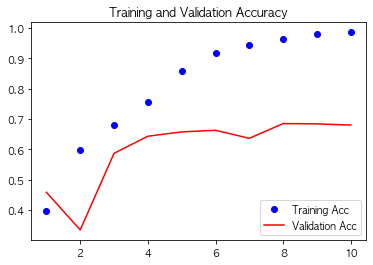

In [35]:
import matplotlib.pyplot as plt

plt.plot(epochs, acc, 'bo', label='Training Acc')
plt.plot(epochs, val_acc, 'r', label='Validation Acc')
plt.title('Training and Validation Accuracy')
plt.legend(loc=4)
plt.show()

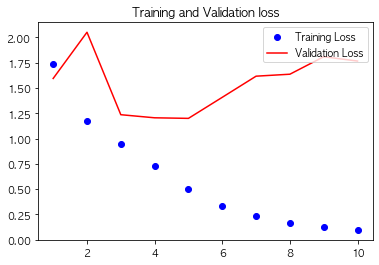

In [36]:
plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation loss')
plt.legend(loc=1)
plt.show()

In [37]:
from keras.models import load_model

loaded_model = load_model(checkpoint_path+model_name)

with open(checkpoint_path+tokenizer_name, 'rb') as handle:
    loaded_tokenizer = pickle.load(handle)

/Users/jsha/opt/anaconda3/envs/nlp3710/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


### 결과

In [39]:
test_eval = loaded_model.evaluate(x_test, y_test)

print('분류1 word_embedding+LSTM+L2 prediction')
print('prediction model loss & acc:', test_eval)

2265/2265 [==============================] - 3s 1ms/step
분류1 word_embedding+LSTM+L2 prediction
prediction model loss & acc: [1.424281131563334, 0.7072847485542297]


## 분류2

In [40]:
import pandas as pd
from matplotlib import rc

rc('font', family='AppleGothic')

data_path = '/Users/jsha/gjai/nlp/pytest/16_practice/'
filename1 = '분류2_뉴스데이터_morphed_train.csv'
filename2 = '분류2_뉴스데이터_morphed_test.csv'

train_df = pd.read_csv(data_path+filename1)
test_df = pd.read_csv(data_path+filename2)

In [41]:
# train_df.head()
# train_df['morphed'] = morphed_data
train_df.head()

,id,날짜,분류2,텍스트,분류2_상위,morphed
0,1319794,20190412,"문화,출판","이들은 성경이 난민에 대해 어떻게 말하고 있으며, 현 상황과 관련해 난민에 대한 정...",문화,성경 난민 대하 어떻하 말 있 현 상황과 관련 난민 대하 정확 하 팩트 밝히
1,1410943,20190503,"사회,사회일반",충북 충주시는 3일 충주시청 중앙탑회의실에서 제47회 어버이날 유공자 시상식을 열고...,사회,충북 충주시 충주시 청 중앙 탑 회의실 어버이날 유공자 시상식 열 심영섭 효행 장한...
2,972814,20190122,"스포츠,축구,한국프로축구","아시안게임이 U-23 대표팀 경기로 A 대표팀과는 객관적 지표에서 차이가 있지만, ...",스포츠,아시안게임 대표 팀 경기 대표 팀 객관적 지표 차이 있 그때 기억 황의 조의 자신감...
3,359452,20180828,"IT_과학,과학","신기술전시회 280개 기업, 국제발명특허대전 160개 발명품, 국제컨퍼런스 40개 ...",IT_과학,신기술 전시회 기업 국제 발명 특허 대전 발명품 국제 컨퍼런스 세션 꾸미 명 관람객...
4,310019,20180816,"스포츠,축구,해외축구",손흥민은 이미 지난 2018 러시아 월드컵 조벌예선 전 경기에 출전했을 뿐더러 토트...,스포츠,손 흥 민 이미 지나 러시아 월드컵 벌 예선 전 경기 출전 토트 넘 미국 프리 시즌...


In [42]:
test_df.head()

,id,날짜,분류2,텍스트,분류2_상위,morphed
0,268980,20180806,"경제,국제경제",이런 가격 조작 행위는 지난해 말 ‘코인 열풍’이 불 때부터 폭발적으로 늘어났다는 ...,경제,이런 가격 조작 행위 지난해 말 코인 열풍 불 때 폭발적 늘어나 설명
1,260551,20180803,"국제,미국_북미",한 정보 소식통에 따르면 이 여성은 지난해 중순쯤 국무부로부터 비밀정보 사용 인가를...,국제,하 정보 소식통 따르 이 여성 지난해 중순쯤 국무부 비밀 정보 사용 인가 취소 당하...
2,390392,20180903,"국제,중국",시진핑(習近平) 중국 국가주석은 오는 11월 파푸아뉴기니에서 열리는 아시아·태평양경...,국제,시진 핑 중국 국가주석 오 파푸아뉴기니 열리 아시아 태평양 경제 협력체 정상 회의 ...
3,215899,20180723,"경제,산업_기업",이번 세이프가드는 최근 3년간 평균 수입물량으로 쿼터를 산정 후 쿼터 초과 수입물량...,경제,이번 세이프가드 최근 평균 수입 물량 쿼터 산정 후 쿼터 초과 수입 물량 대하 관세...
4,380078,20180902,"스포츠,축구,해외축구","손흥민과 이승우, 황의조와 황희찬 등 해외에서 활약하는 선수들은 더 이상 병역 문제...",스포츠,손 흥 민 이승우 황의 황희찬 해외 활약 선수 더 이상 병역 문제 발목 잡히 국내 ...


In [45]:
from sklearn.model_selection import train_test_split

data_text = train_df.loc[:,'morphed'].to_list()
data_label = train_df.loc[:,'분류2_상위'].to_list()
print(data_label[:3])
print(data_text[:3])

print('-'*50)

data_text_test = test_df.loc[:,'morphed'].to_list()
data_label_test = test_df.loc[:,'분류2_상위'].to_list()
print(data_label_test[:3])
print(data_text_test[:3])

train_data_text = data_text
train_data_label = data_label
test_data_text = data_text_test
test_data_label = data_label_test
# train_data_text, test_data_text, train_data_label, test_data_label = \
# train_test_split(data_text, data_label, stratify=data_label, 
#                  test_size=0.3, random_state=1111)

['문화', '사회', '스포츠']
['성경 난민 대하 어떻하 말 있 현 상황과 관련 난민 대하 정확 하 팩트 밝히', '충북 충주시 충주시 청 중앙 탑 회의실 어버이날 유공자 시상식 열 심영섭 효행 장한 어버이 표창장 수여', '아시안게임 대표 팀 경기 대표 팀 객관적 지표 차이 있 그때 기억 황의 조의 자신감 불태우 충분']
--------------------------------------------------
['경제', '국제', '국제']
['이런 가격 조작 행위 지난해 말 코인 열풍 불 때 폭발적 늘어나 설명', '하 정보 소식통 따르 이 여성 지난해 중순쯤 국무부 비밀 정보 사용 인가 취소 당하 직후 해고 되', '시진 핑 중국 국가주석 오 파푸아뉴기니 열리 아시아 태평양 경제 협력체 정상 회의 전후 태평 도서 국 정상 회담 알리']


In [46]:
print(len(train_data_text))
print(len(test_data_text))

4730
1593


In [47]:
from collections import Counter
train_data_label_freq = Counter(train_data_label)
print('train_data_label_freq:', train_data_label_freq)

test_data_label_freq = Counter(test_data_label)
print('test_data_label_freq:', test_data_label_freq)


train_data_label_freq: Counter({'지역': 1047, '경제': 936, '스포츠': 910, '사회': 473, '국제': 466, '문화': 463, 'IT_과학': 288, '정치': 147})
test_data_label_freq: Counter({'지역': 349, '경제': 329, '스포츠': 303, '사회': 163, '국제': 142, 'IT_과학': 126, '문화': 125, '정치': 56})


In [48]:
import numpy as np

text_len = [len(line.split(' ')) for line in train_data_text]
print('최소길이:', np.min(text_len))
print('최대길이:', np.max(text_len))
print('평균길이:', np.round(np.mean(text_len),1))
print('중위수길이:', np.median(text_len))
print('percentile  : [0, 25, 50, 75, 90, 99, 100]')
print('구간별 최대 길이:', np.percentile(text_len, [0, 25, 50, 75, 90, 99, 100]))
print('최소길이 문장:', train_data_text[np.argmin(text_len)])
print('최대길이 문장:', train_data_text[np.argmax(text_len)])

최소길이: 4
최대길이: 54
평균길이: 19.5
중위수길이: 19.0
percentile  : [0, 25, 50, 75, 90, 99, 100]
구간별 최대 길이: [ 4. 16. 19. 22. 27. 35. 54.]
최소길이 문장: 투입 예산 내년 총
최대길이 문장: 주요 신규 사업 삼사해상공원 해 파랑 공원 파도 걷기 보행 조성 새 뜰 사업 축산 블루 시티 조성 사업 예 주 고을 역사 문화 공원 조성 사업 오십천 그린 로드 조성 영덕 도서관 건립 사업 영덕 애니메이션 테마파크 조성 사업 영덕 하 양교 션 강구면 화전 우수 저류 시설 설치 아름답 소하천 꾸 사업


In [49]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np
import math 

max_words = 10000
maxlen = 40

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(train_data_text)
word_index = tokenizer.word_index

In [50]:
print('wjscpdptj %s개의 고유한 토큰을 찾았습니다' % len(word_index))
print('word_index type:', type(word_index))
# print('word_index:', word_index)

wjscpdptj 15300개의 고유한 토큰을 찾았습니다
word_index type: <class 'dict'>


In [51]:
seq_data = tokenizer.texts_to_sequences(train_data_text)
# print('data', data)

len_d = [len(d) for d in seq_data]
# print('길이:', len_d)
print('최대 문장 길이:', max(len_d))
print('최소 문장 길이:', min(len_d))

최대 문장 길이: 49
최소 문장 길이: 4


In [52]:
pad_data = pad_sequences(seq_data, maxlen=maxlen)

print('data:', pad_data)
print('data 0:', pad_data[0])
print('data 0의 길이:', len(pad_data[0]))

data: [[   0    0    0 ...    1 8205   15]
 [   0    0    0 ... 5730 8208 2302]
 [   0    0    0 ... 3627 4436 1497]
 ...
 [   0    0    0 ... 7559 4594   15]
 [   0    0    0 ... 1403 1385    9]
 [   0    0    0 ... 8034 2811  446]]
data 0: [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0 1642  747   10
 2622  208    3  885 4435   87  747   10 1270    1 8205   15]
data 0의 길이: 40


In [53]:
print('train_data_text type:', type(train_data_text))
print('data type:', type(pad_data))
print('train_data_text 0:', train_data_text[0])
print('data 0:', pad_data[0])

train_data_text type: <class 'list'>
data type: <class 'numpy.ndarray'>
train_data_text 0: 성경 난민 대하 어떻하 말 있 현 상황과 관련 난민 대하 정확 하 팩트 밝히
data 0: [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0 1642  747   10
 2622  208    3  885 4435   87  747   10 1270    1 8205   15]


In [54]:
def to_one_hot(sequences, dimension):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

# x_train = to_one_hot(pad_data, dimension=max_words)
x_train = pad_data

In [55]:
# print('train_data_text type:', type(train_data_text))
# print(len(train_data_text[0]))
# print('texts 0:', train_data_text[0])

# print('data type:', type(x_train))
# print(len(x_train[0]))
# print('x_train [0][0:100]:', x_train[0][:100])

In [56]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(train_data_label)
print(le.classes_)
train_data_label = le.transform(train_data_label)

['IT_과학' '경제' '국제' '문화' '사회' '스포츠' '정치' '지역']


In [57]:
test_data_label = le.transform(test_data_label)

In [58]:
class_number = len(le.classes_)
y_train = to_one_hot(train_data_label, dimension=class_number)
print(y_train)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [59]:
data_test = tokenizer.texts_to_sequences(test_data_text)

data_test = pad_sequences(data_test, maxlen=maxlen)

x_test = data_test

y_test = to_one_hot(test_data_label, dimension=class_number)
print(y_test)

[[0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 1. ... 0. 0. 0.]]


In [60]:
print('훈련 데이터 본문 텐서의 크기:', x_train.shape)
print('훈련 데이터 레이블 텐서의 크기:', y_train.shape)

print('테스트 데이터 본문 텐서의 크기:', x_test.shape)
print('테스트 데이터 레이블 텐서의 크기:', y_test.shape)

훈련 데이터 본문 텐서의 크기: (4730, 40)
훈련 데이터 레이블 텐서의 크기: (4730, 8)
테스트 데이터 본문 텐서의 크기: (1593, 40)
테스트 데이터 레이블 텐서의 크기: (1593, 8)


In [61]:
y_train.shape

(4730, 8)

In [62]:
!pwd

/Users/jsha/gjai/nlp/pytest/17_practice


In [63]:
import os

class_number = y_train.shape[-1]
epochs = 10
batch_size = 50
embedding_dim = 200
model_name = '분류2_we_LSTM_l2_model.h5'
tokenizer_name = '분류2_we_LSMT_l2_token.pickle'
labelencode_name = '분류2_we_LSTM_l2_le.pickle'

# working_path = '/Users/jsha/gjai/nlp/pytest/15_working/'
# save_path = working_path + 'practice/'
# if not os.path.exists(save_path):
#     os.mkdir(save_path)
#     print(f'made {save_path} directory')
# os.chdir(save_path)

In [64]:
from keras.models import Sequential
from keras.layers import Dense
from keras import layers
from keras import regularizers

model = Sequential()

model.add(layers.Embedding(input_dim=max_words, output_dim=embedding_dim, 
                          input_length=maxlen))

model.add(layers.LSTM(128))

model.add(Dense(64, kernel_regularizer=regularizers.l2(0.001), activation='relu', input_shape=(max_words,)))
model.add(Dense(units=32, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
model.add(Dense(units=class_number, activation='softmax'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 40, 200)           2000000   
_________________________________________________________________
lstm_3 (LSTM)                (None, 128)               168448    
_________________________________________________________________
dense_4 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_5 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_6 (Dense)              (None, 8)                 264       
Total params: 2,179,048
Trainable params: 2,179,048
Non-trainable params: 0
_________________________________________________________________


In [65]:
from keras.callbacks import EarlyStopping
import os

checkpoint_path = working_path
# checkpoint_dir = os.path.dirname(checkpoint_path)
if os.path.exists(checkpoint_path):
    print('{} --- Folder already exists\n'.format(checkpoint_path))
else:
    os.makedirs(checkpoint_path, exist_ok=True)
    print('{} --- Folder created\n'.format(checkpoint_path))

/Users/jsha/gjai/nlp/pytest/17_practice/ --- Folder already exists



In [66]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy',
             metrics=['acc'])

In [67]:
from keras.callbacks import ModelCheckpoint

earlystop_callback = EarlyStopping(monitor='val_acc', patience=2)
cp_callback = ModelCheckpoint(filepath=checkpoint_path+model_name,
                             monitor='val_acc', verbose=1, 
                             save_best_only=True)
history = model.fit(x_train, y_train, epochs=epochs,
                   batch_size=batch_size, validation_split=0.3,
                   callbacks=[earlystop_callback, cp_callback], verbose=1)
history_dict = history.history

/Users/jsha/opt/anaconda3/envs/nlp3710/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 3311 samples, validate on 1419 samples
Epoch 1/10
3311/3311 [==============================] - 14s 4ms/step - loss: 1.9621 - acc: 0.2809 - val_loss: 1.7424 - val_acc: 0.4292

Epoch 00001: val_acc improved from -inf to 0.42918, saving model to /Users/jsha/gjai/nlp/pytest/17_practice/분류2_we_LSTM_l2_model.h5
Epoch 2/10
3311/3311 [==============================] - 13s 4ms/step - loss: 1.4854 - acc: 0.4603 - val_loss: 1.5373 - val_acc: 0.4581

Epoch 00002: val_acc improved from 0.42918 to 0.45807, saving model to /Users/jsha/gjai/nlp/pytest/17_practice/분류2_we_LSTM_l2_model.h5
Epoch 3/10
3311/3311 [==============================] - 13s 4ms/step - loss: 1.1610 - acc: 0.5850 - val_loss: 1.4684 - val_acc: 0.4891

Epoch 00003: val_acc improved from 0.45807 to 0.48908, saving model to /Users/jsha/gjai/nlp/pytest/17_practice/분류2_we_LSTM_l2_model.h5
Epoch 4/10
3311/3311 [==============================] - 13s 4ms/step - loss: 0.8441 - acc: 0.7424 - val_loss: 1.8334 - val_acc: 0.4602

Epoch 

In [68]:
import pickle

# model.save(model_name)

with open(checkpoint_path+tokenizer_name, 'wb') as file:
    pickle.dump(tokenizer, file, protocol=pickle.HIGHEST_PROTOCOL)
    
with open(checkpoint_path+labelencode_name, 'wb') as file:
    pickle.dump(le, file, protocol=pickle.HIGHEST_PROTOCOL)
    

In [69]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

print('validation accuracy of each epoch:', np.round(val_acc,3))
epochs = range(1, len(val_acc)+1)

validation accuracy of each epoch: [0.429 0.458 0.489 0.46  0.513 0.466 0.564 0.55  0.555]


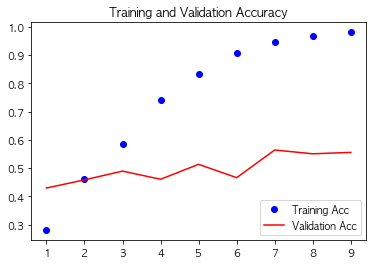

In [70]:
import matplotlib.pyplot as plt

plt.plot(epochs, acc, 'bo', label='Training Acc')
plt.plot(epochs, val_acc, 'r', label='Validation Acc')
plt.title('Training and Validation Accuracy')
plt.legend(loc=4)
plt.show()

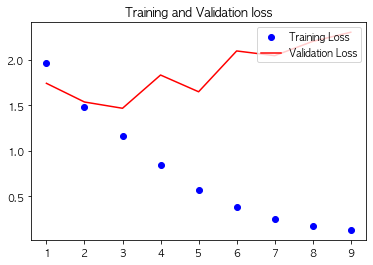

In [71]:
plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation loss')
plt.legend(loc=1)
plt.show()

In [72]:
from keras.models import load_model

loaded_model = load_model(checkpoint_path+model_name)

with open(checkpoint_path+tokenizer_name, 'rb') as handle:
    loaded_tokenizer = pickle.load(handle)

/Users/jsha/opt/anaconda3/envs/nlp3710/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


### 결과

In [74]:
test_eval = loaded_model.evaluate(x_test, y_test)

print('분류2 word_embedding+LSTM+L2 prediction')
print('prediction model loss & acc:', test_eval)

1593/1593 [==============================] - 2s 1ms/step
분류2 word_embedding+LSTM+L2 prediction
prediction model loss & acc: [2.0407698943191406, 0.5605775117874146]


# 워드임베딩 + 순환신경망 + Dropout

## 분류1

In [75]:
import pandas as pd
from matplotlib import rc

rc('font', family='AppleGothic')

data_path = '/Users/jsha/gjai/nlp/pytest/16_practice/'
filename1 = '분류1_뉴스데이터_morphed_train.csv'
filename2 = '분류1_뉴스데이터_morphed_test.csv'

train_df = pd.read_csv(data_path+filename1)
test_df = pd.read_csv(data_path+filename2)

In [76]:
# train_df.head()
# train_df['morphed'] = morphed_data
train_df.head()

,id,날짜,분류1,텍스트,분류1_상위,morphed
0,1319794,20190412,"국제,중동_아프리카","이들은 성경이 난민에 대해 어떻게 말하고 있으며, 현 상황과 관련해 난민에 대한 정...",국제,성경 난민 대하 어떻하 말 있 현 상황과 관련 난민 대하 정확 하 팩트 밝히
1,1410943,20190503,"지역,충북",충북 충주시는 3일 충주시청 중앙탑회의실에서 제47회 어버이날 유공자 시상식을 열고...,지역,충북 충주시 충주시 청 중앙 탑 회의실 어버이날 유공자 시상식 열 심영섭 효행 장한...
2,972814,20190122,"스포츠,축구,국가대표팀","아시안게임이 U-23 대표팀 경기로 A 대표팀과는 객관적 지표에서 차이가 있지만, ...",스포츠,아시안게임 대표 팀 경기 대표 팀 객관적 지표 차이 있 그때 기억 황의 조의 자신감...
3,359452,20180828,"IT_과학,콘텐츠","신기술전시회 280개 기업, 국제발명특허대전 160개 발명품, 국제컨퍼런스 40개 ...",IT_과학,신기술 전시회 기업 국제 발명 특허 대전 발명품 국제 컨퍼런스 세션 꾸미 명 관람객...
4,1338926,20190416,"사회,장애인","아카데미에서는 장애인복지시설, 발달장애인훈련센터 등 학령기 장애인 대상으로의 진로직...",사회,아카데미 장애인 복지 시설 발달 장애 훈련 센터 학령기 장애인 대상 진로 직업 체험...


In [77]:
test_df.head()

,id,날짜,분류1,텍스트,분류1_상위,morphed
0,268980,20180806,"경제,증권_증시",이런 가격 조작 행위는 지난해 말 ‘코인 열풍’이 불 때부터 폭발적으로 늘어났다는 ...,경제,이런 가격 조작 행위 지난해 말 코인 열풍 불 때 폭발적 늘어나 설명
1,260551,20180803,"국제,러시아",한 정보 소식통에 따르면 이 여성은 지난해 중순쯤 국무부로부터 비밀정보 사용 인가를...,국제,하 정보 소식통 따르 이 여성 지난해 중순쯤 국무부 비밀 정보 사용 인가 취소 당하...
2,390392,20180903,"국제,아시아",시진핑(習近平) 중국 국가주석은 오는 11월 파푸아뉴기니에서 열리는 아시아·태평양경...,국제,시진 핑 중국 국가주석 오 파푸아뉴기니 열리 아시아 태평양 경제 협력체 정상 회의 ...
3,215899,20180723,"경제,무역",이번 세이프가드는 최근 3년간 평균 수입물량으로 쿼터를 산정 후 쿼터 초과 수입물량...,경제,이번 세이프가드 최근 평균 수입 물량 쿼터 산정 후 쿼터 초과 수입 물량 대하 관세...
4,380078,20180902,"스포츠,축구,국가대표팀","손흥민과 이승우, 황의조와 황희찬 등 해외에서 활약하는 선수들은 더 이상 병역 문제...",스포츠,손 흥 민 이승우 황의 황희찬 해외 활약 선수 더 이상 병역 문제 발목 잡히 국내 ...


In [78]:
from sklearn.model_selection import train_test_split

data_text = train_df.loc[:,'morphed'].to_list()
data_label = train_df.loc[:,'분류1_상위'].to_list()
print(data_label[:3])
print(data_text[:3])

print('-'*50)

data_text_test = test_df.loc[:,'morphed'].to_list()
data_label_test = test_df.loc[:,'분류1_상위'].to_list()
print(data_label_test[:3])
print(data_text_test[:3])

train_data_text = data_text
train_data_label = data_label
test_data_text = data_text_test
test_data_label = data_label_test
# train_data_text, test_data_text, train_data_label, test_data_label = \
# train_test_split(data_text, data_label, stratify=data_label, 
#                  test_size=0.3, random_state=1111)

['국제', '지역', '스포츠']
['성경 난민 대하 어떻하 말 있 현 상황과 관련 난민 대하 정확 하 팩트 밝히', '충북 충주시 충주시 청 중앙 탑 회의실 어버이날 유공자 시상식 열 심영섭 효행 장한 어버이 표창장 수여', '아시안게임 대표 팀 경기 대표 팀 객관적 지표 차이 있 그때 기억 황의 조의 자신감 불태우 충분']
--------------------------------------------------
['경제', '국제', '국제']
['이런 가격 조작 행위 지난해 말 코인 열풍 불 때 폭발적 늘어나 설명', '하 정보 소식통 따르 이 여성 지난해 중순쯤 국무부 비밀 정보 사용 인가 취소 당하 직후 해고 되', '시진 핑 중국 국가주석 오 파푸아뉴기니 열리 아시아 태평양 경제 협력체 정상 회의 전후 태평 도서 국 정상 회담 알리']


In [79]:
print(len(train_data_text))
print(len(test_data_text))

6792
2265


In [80]:
from collections import Counter
train_data_label_freq = Counter(train_data_label)
print('train_data_label_freq:', train_data_label_freq)

test_data_label_freq = Counter(test_data_label)
print('test_data_label_freq:', test_data_label_freq)


train_data_label_freq: Counter({'지역': 2151, '스포츠': 1725, '경제': 945, '국제': 733, '사회': 639, 'IT_과학': 491, '문화': 98, '미분류': 9, '정치': 1})
test_data_label_freq: Counter({'지역': 722, '스포츠': 540, '경제': 329, '국제': 219, '사회': 213, 'IT_과학': 203, '문화': 30, '미분류': 9})


In [81]:
import numpy as np

text_len = [len(line.split(' ')) for line in train_data_text]
print('최소길이:', np.min(text_len))
print('최대길이:', np.max(text_len))
print('평균길이:', np.round(np.mean(text_len),1))
print('중위수길이:', np.median(text_len))
print('percentile  : [0, 25, 50, 75, 90, 99, 100]')
print('구간별 최대 길이:', np.percentile(text_len, [0, 25, 50, 75, 90, 99, 100]))
print('최소길이 문장:', train_data_text[np.argmin(text_len)])
print('최대길이 문장:', train_data_text[np.argmax(text_len)])

최소길이: 4
최대길이: 54
평균길이: 19.5
중위수길이: 19.0
percentile  : [0, 25, 50, 75, 90, 99, 100]
구간별 최대 길이: [ 4. 16. 19. 22. 27. 35. 54.]
최소길이 문장: 투입 예산 내년 총
최대길이 문장: 주요 신규 사업 삼사해상공원 해 파랑 공원 파도 걷기 보행 조성 새 뜰 사업 축산 블루 시티 조성 사업 예 주 고을 역사 문화 공원 조성 사업 오십천 그린 로드 조성 영덕 도서관 건립 사업 영덕 애니메이션 테마파크 조성 사업 영덕 하 양교 션 강구면 화전 우수 저류 시설 설치 아름답 소하천 꾸 사업


In [82]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np
import math 

max_words = 10000
maxlen = 40

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(train_data_text)
word_index = tokenizer.word_index

In [83]:
print('wjscpdptj %s개의 고유한 토큰을 찾았습니다' % len(word_index))
print('word_index type:', type(word_index))
# print('word_index:', word_index)

wjscpdptj 18050개의 고유한 토큰을 찾았습니다
word_index type: <class 'dict'>


In [84]:
seq_data = tokenizer.texts_to_sequences(train_data_text)
# print('data', data)

len_d = [len(d) for d in seq_data]
# print('길이:', len_d)
print('최대 문장 길이:', max(len_d))
print('최소 문장 길이:', min(len_d))

최대 문장 길이: 49
최소 문장 길이: 4


In [85]:
pad_data = pad_sequences(seq_data, maxlen=maxlen)

print('data:', pad_data)
print('data 0:', pad_data[0])
print('data 0의 길이:', len(pad_data[0]))

data: [[   0    0    0 ...    1 7165   18]
 [   0    0    0 ... 7168 7169 2108]
 [   0    0    0 ... 3970 4700 1797]
 ...
 [   0    0    0 ... 9362 5861   18]
 [   0    0    0 ... 1042 1564   13]
 [   0    0    0 ... 9916 3268  362]]
data 0: [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0 2300  677   10
 2301  220    3  790 4698   76  677   10 1389    1 7165   18]
data 0의 길이: 40


In [86]:
print('train_data_text type:', type(train_data_text))
print('data type:', type(pad_data))
print('train_data_text 0:', train_data_text[0])
print('data 0:', pad_data[0])

train_data_text type: <class 'list'>
data type: <class 'numpy.ndarray'>
train_data_text 0: 성경 난민 대하 어떻하 말 있 현 상황과 관련 난민 대하 정확 하 팩트 밝히
data 0: [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0 2300  677   10
 2301  220    3  790 4698   76  677   10 1389    1 7165   18]


In [87]:
def to_one_hot(sequences, dimension):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

# x_train = to_one_hot(pad_data, dimension=max_words)
x_train = pad_data

In [88]:
# print('train_data_text type:', type(train_data_text))
# print(len(train_data_text[0]))
# print('texts 0:', train_data_text[0])

# print('data type:', type(x_train))
# print(len(x_train[0]))
# print('x_train [0][0:100]:', x_train[0][:100])

In [89]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(train_data_label)
print(le.classes_)
train_data_label = le.transform(train_data_label)

['IT_과학' '경제' '국제' '문화' '미분류' '사회' '스포츠' '정치' '지역']


In [90]:
test_data_label = le.transform(test_data_label)

In [91]:
class_number = len(le.classes_)
y_train = to_one_hot(train_data_label, dimension=class_number)
print(y_train)

[[0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 1. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


In [92]:
data_test = tokenizer.texts_to_sequences(test_data_text)

data_test = pad_sequences(data_test, maxlen=maxlen)

x_test = data_test

y_test = to_one_hot(test_data_label, dimension=class_number)
print(y_test)

[[0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]]


In [93]:
print('훈련 데이터 본문 텐서의 크기:', x_train.shape)
print('훈련 데이터 레이블 텐서의 크기:', y_train.shape)

print('테스트 데이터 본문 텐서의 크기:', x_test.shape)
print('테스트 데이터 레이블 텐서의 크기:', y_test.shape)

훈련 데이터 본문 텐서의 크기: (6792, 40)
훈련 데이터 레이블 텐서의 크기: (6792, 9)
테스트 데이터 본문 텐서의 크기: (2265, 40)
테스트 데이터 레이블 텐서의 크기: (2265, 9)


In [94]:
y_train.shape

(6792, 9)

In [95]:
!pwd

/Users/jsha/gjai/nlp/pytest/17_practice


In [96]:
import os

class_number = y_train.shape[-1]
epochs = 10
batch_size = 50
embedding_dim = 200
model_name = '분류1_we_rnn_dropout_model.h5'
tokenizer_name = '분류1_we_rnn_dropout_token.pickle'
labelencode_name = '분류1_we_rnn_dropout_le.pickle'

# working_path = '/Users/jsha/gjai/nlp/pytest/15_working/'
# save_path = working_path + 'practice/'
# if not os.path.exists(save_path):
#     os.mkdir(save_path)
#     print(f'made {save_path} directory')
# os.chdir(save_path)

In [97]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import layers
from keras import regularizers

model = Sequential()

model.add(layers.Embedding(input_dim=max_words, output_dim=embedding_dim, 
                          input_length=maxlen))

model.add(layers.LSTM(128))
model.add(Dropout(0.5))

model.add(Dense(64, kernel_regularizer=regularizers.l2(0.001), activation='relu', input_shape=(max_words,)))
model.add(Dense(units=32, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=class_number, activation='softmax'))

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 40, 200)           2000000   
_________________________________________________________________
lstm_4 (LSTM)                (None, 128)               168448    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_8 (Dense)              (None, 32)                2080      
_________________________________________________________________
dropout_2 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 9)                

In [98]:
from keras.callbacks import EarlyStopping
import os

checkpoint_path = working_path
# checkpoint_dir = os.path.dirname(checkpoint_path)
if os.path.exists(checkpoint_path):
    print('{} --- Folder already exists\n'.format(checkpoint_path))
else:
    os.makedirs(checkpoint_path, exist_ok=True)
    print('{} --- Folder created\n'.format(checkpoint_path))

/Users/jsha/gjai/nlp/pytest/17_practice/ --- Folder already exists



In [99]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy',
             metrics=['acc'])

In [100]:
from keras.callbacks import ModelCheckpoint

earlystop_callback = EarlyStopping(monitor='val_acc', patience=2)
cp_callback = ModelCheckpoint(filepath=checkpoint_path+model_name,
                             monitor='val_acc', verbose=1, 
                             save_best_only=True)
history = model.fit(x_train, y_train, epochs=epochs,
                   batch_size=batch_size, validation_split=0.3,
                   callbacks=[earlystop_callback, cp_callback], verbose=1)
history_dict = history.history

/Users/jsha/opt/anaconda3/envs/nlp3710/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 4754 samples, validate on 2038 samples
Epoch 1/10
4754/4754 [==============================] - 22s 5ms/step - loss: 1.9183 - acc: 0.3284 - val_loss: 1.4509 - val_acc: 0.5309

Epoch 00001: val_acc improved from -inf to 0.53091, saving model to /Users/jsha/gjai/nlp/pytest/17_practice/분류1_we_rnn_l2_model.h5
Epoch 2/10
4754/4754 [==============================] - 21s 4ms/step - loss: 1.3311 - acc: 0.5536 - val_loss: 1.2507 - val_acc: 0.5707

Epoch 00002: val_acc improved from 0.53091 to 0.57066, saving model to /Users/jsha/gjai/nlp/pytest/17_practice/분류1_we_rnn_l2_model.h5
Epoch 3/10
4754/4754 [==============================] - 23s 5ms/step - loss: 1.0698 - acc: 0.6397 - val_loss: 1.2775 - val_acc: 0.6035

Epoch 00003: val_acc improved from 0.57066 to 0.60353, saving model to /Users/jsha/gjai/nlp/pytest/17_practice/분류1_we_rnn_l2_model.h5
Epoch 4/10
4754/4754 [==============================] - 23s 5ms/step - loss: 0.8580 - acc: 0.7127 - val_loss: 1.3262 - val_acc: 0.6452

Epoch 000

In [101]:
import pickle

# model.save(model_name)

with open(checkpoint_path+tokenizer_name, 'wb') as file:
    pickle.dump(tokenizer, file, protocol=pickle.HIGHEST_PROTOCOL)
    
with open(checkpoint_path+labelencode_name, 'wb') as file:
    pickle.dump(le, file, protocol=pickle.HIGHEST_PROTOCOL)
    

In [102]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

print('validation accuracy of each epoch:', np.round(val_acc,3))
epochs = range(1, len(val_acc)+1)

validation accuracy of each epoch: [0.531 0.571 0.604 0.645 0.659 0.632 0.668 0.692 0.696 0.689]


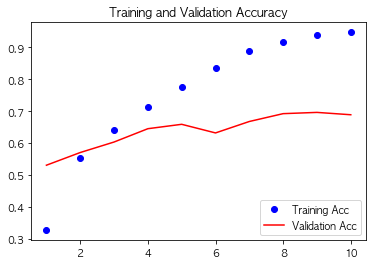

In [103]:
import matplotlib.pyplot as plt

plt.plot(epochs, acc, 'bo', label='Training Acc')
plt.plot(epochs, val_acc, 'r', label='Validation Acc')
plt.title('Training and Validation Accuracy')
plt.legend(loc=4)
plt.show()

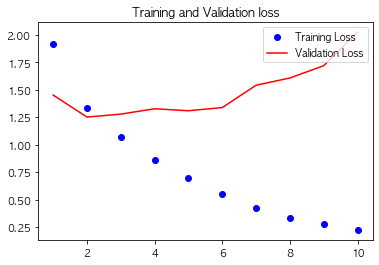

In [104]:
plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation loss')
plt.legend(loc=1)
plt.show()

In [105]:
from keras.models import load_model

loaded_model = load_model(checkpoint_path+model_name)

with open(checkpoint_path+tokenizer_name, 'rb') as handle:
    loaded_tokenizer = pickle.load(handle)

/Users/jsha/opt/anaconda3/envs/nlp3710/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


### 결과

In [107]:
test_eval = loaded_model.evaluate(x_test, y_test)

print('분류1 word_embedding+LSTM+Dropout prediction')
print('prediction model loss & acc:', test_eval)

2265/2265 [==============================] - 3s 1ms/step
분류1 word_embedding+LSTM+Dropout prediction
prediction model loss & acc: [1.5827102541134057, 0.6997792720794678]


## 분류2

In [134]:
import pandas as pd
from matplotlib import rc

rc('font', family='AppleGothic')

data_path = '/Users/jsha/gjai/nlp/pytest/16_practice/'
filename1 = '분류2_뉴스데이터_morphed_train.csv'
filename2 = '분류2_뉴스데이터_morphed_test.csv'

train_df = pd.read_csv(data_path+filename1)
test_df = pd.read_csv(data_path+filename2)

In [135]:
# train_df.head()
# train_df['morphed'] = morphed_data
train_df.head()

,id,날짜,분류2,텍스트,분류2_상위,morphed
0,1319794,20190412,"문화,출판","이들은 성경이 난민에 대해 어떻게 말하고 있으며, 현 상황과 관련해 난민에 대한 정...",문화,성경 난민 대하 어떻하 말 있 현 상황과 관련 난민 대하 정확 하 팩트 밝히
1,1410943,20190503,"사회,사회일반",충북 충주시는 3일 충주시청 중앙탑회의실에서 제47회 어버이날 유공자 시상식을 열고...,사회,충북 충주시 충주시 청 중앙 탑 회의실 어버이날 유공자 시상식 열 심영섭 효행 장한...
2,972814,20190122,"스포츠,축구,한국프로축구","아시안게임이 U-23 대표팀 경기로 A 대표팀과는 객관적 지표에서 차이가 있지만, ...",스포츠,아시안게임 대표 팀 경기 대표 팀 객관적 지표 차이 있 그때 기억 황의 조의 자신감...
3,359452,20180828,"IT_과학,과학","신기술전시회 280개 기업, 국제발명특허대전 160개 발명품, 국제컨퍼런스 40개 ...",IT_과학,신기술 전시회 기업 국제 발명 특허 대전 발명품 국제 컨퍼런스 세션 꾸미 명 관람객...
4,310019,20180816,"스포츠,축구,해외축구",손흥민은 이미 지난 2018 러시아 월드컵 조벌예선 전 경기에 출전했을 뿐더러 토트...,스포츠,손 흥 민 이미 지나 러시아 월드컵 벌 예선 전 경기 출전 토트 넘 미국 프리 시즌...


In [136]:
test_df.head()

,id,날짜,분류2,텍스트,분류2_상위,morphed
0,268980,20180806,"경제,국제경제",이런 가격 조작 행위는 지난해 말 ‘코인 열풍’이 불 때부터 폭발적으로 늘어났다는 ...,경제,이런 가격 조작 행위 지난해 말 코인 열풍 불 때 폭발적 늘어나 설명
1,260551,20180803,"국제,미국_북미",한 정보 소식통에 따르면 이 여성은 지난해 중순쯤 국무부로부터 비밀정보 사용 인가를...,국제,하 정보 소식통 따르 이 여성 지난해 중순쯤 국무부 비밀 정보 사용 인가 취소 당하...
2,390392,20180903,"국제,중국",시진핑(習近平) 중국 국가주석은 오는 11월 파푸아뉴기니에서 열리는 아시아·태평양경...,국제,시진 핑 중국 국가주석 오 파푸아뉴기니 열리 아시아 태평양 경제 협력체 정상 회의 ...
3,215899,20180723,"경제,산업_기업",이번 세이프가드는 최근 3년간 평균 수입물량으로 쿼터를 산정 후 쿼터 초과 수입물량...,경제,이번 세이프가드 최근 평균 수입 물량 쿼터 산정 후 쿼터 초과 수입 물량 대하 관세...
4,380078,20180902,"스포츠,축구,해외축구","손흥민과 이승우, 황의조와 황희찬 등 해외에서 활약하는 선수들은 더 이상 병역 문제...",스포츠,손 흥 민 이승우 황의 황희찬 해외 활약 선수 더 이상 병역 문제 발목 잡히 국내 ...


In [137]:
from sklearn.model_selection import train_test_split

data_text = train_df.loc[:,'morphed'].to_list()
data_label = train_df.loc[:,'분류2_상위'].to_list()
print(data_label[:3])
print(data_text[:3])

print('-'*50)

data_text_test = test_df.loc[:,'morphed'].to_list()
data_label_test = test_df.loc[:,'분류2_상위'].to_list()
print(data_label_test[:3])
print(data_text_test[:3])

train_data_text = data_text
train_data_label = data_label
test_data_text = data_text_test
test_data_label = data_label_test
# train_data_text, test_data_text, train_data_label, test_data_label = \
# train_test_split(data_text, data_label, stratify=data_label, 
#                  test_size=0.3, random_state=1111)

['문화', '사회', '스포츠']
['성경 난민 대하 어떻하 말 있 현 상황과 관련 난민 대하 정확 하 팩트 밝히', '충북 충주시 충주시 청 중앙 탑 회의실 어버이날 유공자 시상식 열 심영섭 효행 장한 어버이 표창장 수여', '아시안게임 대표 팀 경기 대표 팀 객관적 지표 차이 있 그때 기억 황의 조의 자신감 불태우 충분']
--------------------------------------------------
['경제', '국제', '국제']
['이런 가격 조작 행위 지난해 말 코인 열풍 불 때 폭발적 늘어나 설명', '하 정보 소식통 따르 이 여성 지난해 중순쯤 국무부 비밀 정보 사용 인가 취소 당하 직후 해고 되', '시진 핑 중국 국가주석 오 파푸아뉴기니 열리 아시아 태평양 경제 협력체 정상 회의 전후 태평 도서 국 정상 회담 알리']


In [138]:
print(len(train_data_text))
print(len(test_data_text))

4730
1593


In [139]:
from collections import Counter
train_data_label_freq = Counter(train_data_label)
print('train_data_label_freq:', train_data_label_freq)

test_data_label_freq = Counter(test_data_label)
print('test_data_label_freq:', test_data_label_freq)


train_data_label_freq: Counter({'지역': 1047, '경제': 936, '스포츠': 910, '사회': 473, '국제': 466, '문화': 463, 'IT_과학': 288, '정치': 147})
test_data_label_freq: Counter({'지역': 349, '경제': 329, '스포츠': 303, '사회': 163, '국제': 142, 'IT_과학': 126, '문화': 125, '정치': 56})


In [140]:
import numpy as np

text_len = [len(line.split(' ')) for line in train_data_text]
print('최소길이:', np.min(text_len))
print('최대길이:', np.max(text_len))
print('평균길이:', np.round(np.mean(text_len),1))
print('중위수길이:', np.median(text_len))
print('percentile  : [0, 25, 50, 75, 90, 99, 100]')
print('구간별 최대 길이:', np.percentile(text_len, [0, 25, 50, 75, 90, 99, 100]))
print('최소길이 문장:', train_data_text[np.argmin(text_len)])
print('최대길이 문장:', train_data_text[np.argmax(text_len)])

최소길이: 4
최대길이: 54
평균길이: 19.5
중위수길이: 19.0
percentile  : [0, 25, 50, 75, 90, 99, 100]
구간별 최대 길이: [ 4. 16. 19. 22. 27. 35. 54.]
최소길이 문장: 투입 예산 내년 총
최대길이 문장: 주요 신규 사업 삼사해상공원 해 파랑 공원 파도 걷기 보행 조성 새 뜰 사업 축산 블루 시티 조성 사업 예 주 고을 역사 문화 공원 조성 사업 오십천 그린 로드 조성 영덕 도서관 건립 사업 영덕 애니메이션 테마파크 조성 사업 영덕 하 양교 션 강구면 화전 우수 저류 시설 설치 아름답 소하천 꾸 사업


In [141]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np
import math 

max_words = 10000
maxlen = 40

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(train_data_text)
word_index = tokenizer.word_index

In [142]:
print('wjscpdptj %s개의 고유한 토큰을 찾았습니다' % len(word_index))
print('word_index type:', type(word_index))
# print('word_index:', word_index)

wjscpdptj 15300개의 고유한 토큰을 찾았습니다
word_index type: <class 'dict'>


In [143]:
seq_data = tokenizer.texts_to_sequences(train_data_text)
# print('data', data)

len_d = [len(d) for d in seq_data]
# print('길이:', len_d)
print('최대 문장 길이:', max(len_d))
print('최소 문장 길이:', min(len_d))

최대 문장 길이: 49
최소 문장 길이: 4


In [144]:
pad_data = pad_sequences(seq_data, maxlen=maxlen)

print('data:', pad_data)
print('data 0:', pad_data[0])
print('data 0의 길이:', len(pad_data[0]))

data: [[   0    0    0 ...    1 8205   15]
 [   0    0    0 ... 5730 8208 2302]
 [   0    0    0 ... 3627 4436 1497]
 ...
 [   0    0    0 ... 7559 4594   15]
 [   0    0    0 ... 1403 1385    9]
 [   0    0    0 ... 8034 2811  446]]
data 0: [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0 1642  747   10
 2622  208    3  885 4435   87  747   10 1270    1 8205   15]
data 0의 길이: 40


In [145]:
print('train_data_text type:', type(train_data_text))
print('data type:', type(pad_data))
print('train_data_text 0:', train_data_text[0])
print('data 0:', pad_data[0])

train_data_text type: <class 'list'>
data type: <class 'numpy.ndarray'>
train_data_text 0: 성경 난민 대하 어떻하 말 있 현 상황과 관련 난민 대하 정확 하 팩트 밝히
data 0: [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0 1642  747   10
 2622  208    3  885 4435   87  747   10 1270    1 8205   15]


In [146]:
def to_one_hot(sequences, dimension):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

# x_train = to_one_hot(pad_data, dimension=max_words)
x_train = pad_data

In [147]:
# print('train_data_text type:', type(train_data_text))
# print(len(train_data_text[0]))
# print('texts 0:', train_data_text[0])

# print('data type:', type(x_train))
# print(len(x_train[0]))
# print('x_train [0][0:100]:', x_train[0][:100])

In [148]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(train_data_label)
print(le.classes_)
train_data_label = le.transform(train_data_label)

['IT_과학' '경제' '국제' '문화' '사회' '스포츠' '정치' '지역']


In [149]:
test_data_label = le.transform(test_data_label)

In [150]:
class_number = len(le.classes_)
y_train = to_one_hot(train_data_label, dimension=class_number)
print(y_train)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [151]:
data_test = tokenizer.texts_to_sequences(test_data_text)

data_test = pad_sequences(data_test, maxlen=maxlen)

x_test = data_test

y_test = to_one_hot(test_data_label, dimension=class_number)
print(y_test)

[[0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 1. ... 0. 0. 0.]]


In [152]:
print('훈련 데이터 본문 텐서의 크기:', x_train.shape)
print('훈련 데이터 레이블 텐서의 크기:', y_train.shape)

print('테스트 데이터 본문 텐서의 크기:', x_test.shape)
print('테스트 데이터 레이블 텐서의 크기:', y_test.shape)

훈련 데이터 본문 텐서의 크기: (4730, 40)
훈련 데이터 레이블 텐서의 크기: (4730, 8)
테스트 데이터 본문 텐서의 크기: (1593, 40)
테스트 데이터 레이블 텐서의 크기: (1593, 8)


In [153]:
y_train.shape

(4730, 8)

In [154]:
!pwd

/Users/jsha/gjai/nlp/pytest/17_practice


In [155]:
import os

class_number = y_train.shape[-1]
epochs = 10
batch_size = 50
embedding_dim = 200
model_name = '분류2_we_LSTM_dropout_model.h5'
tokenizer_name = '분류2_we_LSMT_dropout_token.pickle'
labelencode_name = '분류2_we_LSTM_dropout_le.pickle'

# working_path = '/Users/jsha/gjai/nlp/pytest/15_working/'
# save_path = working_path + 'practice/'
# if not os.path.exists(save_path):
#     os.mkdir(save_path)
#     print(f'made {save_path} directory')
# os.chdir(save_path)

In [156]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import layers
from keras import regularizers

model = Sequential()

model.add(layers.Embedding(input_dim=max_words, output_dim=embedding_dim, 
                          input_length=maxlen))

model.add(layers.LSTM(128))

model.add(Dense(64, activation='relu', input_shape=(max_words,)))
model.add(Dropout(0.5))
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=class_number, activation='softmax'))

model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 40, 200)           2000000   
_________________________________________________________________
lstm_6 (LSTM)                (None, 128)               168448    
_________________________________________________________________
dense_13 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_5 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_14 (Dense)             (None, 32)                2080      
_________________________________________________________________
dropout_6 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_15 (Dense)             (None, 8)                

In [157]:
from keras.callbacks import EarlyStopping
import os

checkpoint_path = working_path
# checkpoint_dir = os.path.dirname(checkpoint_path)
if os.path.exists(checkpoint_path):
    print('{} --- Folder already exists\n'.format(checkpoint_path))
else:
    os.makedirs(checkpoint_path, exist_ok=True)
    print('{} --- Folder created\n'.format(checkpoint_path))

/Users/jsha/gjai/nlp/pytest/17_practice/ --- Folder already exists



In [158]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy',
             metrics=['acc'])

In [159]:
from keras.callbacks import ModelCheckpoint

earlystop_callback = EarlyStopping(monitor='val_acc', patience=2)
cp_callback = ModelCheckpoint(filepath=checkpoint_path+model_name,
                             monitor='val_acc', verbose=1, 
                             save_best_only=True)
history = model.fit(x_train, y_train, epochs=epochs,
                   batch_size=batch_size, validation_split=0.3,
                   callbacks=[earlystop_callback, cp_callback], verbose=1)
history_dict = history.history

/Users/jsha/opt/anaconda3/envs/nlp3710/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 3311 samples, validate on 1419 samples
Epoch 1/10
3311/3311 [==============================] - 14s 4ms/step - loss: 1.9713 - acc: 0.2253 - val_loss: 1.7123 - val_acc: 0.4003

Epoch 00001: val_acc improved from -inf to 0.40028, saving model to /Users/jsha/gjai/nlp/pytest/17_practice/분류2_we_LSTM_dropout_model.h5
Epoch 2/10
3311/3311 [==============================] - 13s 4ms/step - loss: 1.6075 - acc: 0.3911 - val_loss: 1.5245 - val_acc: 0.4616

Epoch 00002: val_acc improved from 0.40028 to 0.46159, saving model to /Users/jsha/gjai/nlp/pytest/17_practice/분류2_we_LSTM_dropout_model.h5
Epoch 3/10
3311/3311 [==============================] - 13s 4ms/step - loss: 1.3825 - acc: 0.5159 - val_loss: 1.3911 - val_acc: 0.5144

Epoch 00003: val_acc improved from 0.46159 to 0.51445, saving model to /Users/jsha/gjai/nlp/pytest/17_practice/분류2_we_LSTM_dropout_model.h5
Epoch 4/10
3311/3311 [==============================] - 14s 4ms/step - loss: 1.1453 - acc: 0.5974 - val_loss: 1.4718 - val_acc:

In [160]:
import pickle

# model.save(model_name)

with open(checkpoint_path+tokenizer_name, 'wb') as file:
    pickle.dump(tokenizer, file, protocol=pickle.HIGHEST_PROTOCOL)
    
with open(checkpoint_path+labelencode_name, 'wb') as file:
    pickle.dump(le, file, protocol=pickle.HIGHEST_PROTOCOL)
    

In [161]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

print('validation accuracy of each epoch:', np.round(val_acc,3))
epochs = range(1, len(val_acc)+1)

validation accuracy of each epoch: [0.4   0.462 0.514 0.537 0.555 0.543 0.481]


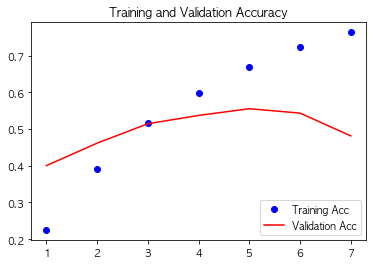

In [162]:
import matplotlib.pyplot as plt

plt.plot(epochs, acc, 'bo', label='Training Acc')
plt.plot(epochs, val_acc, 'r', label='Validation Acc')
plt.title('Training and Validation Accuracy')
plt.legend(loc=4)
plt.show()

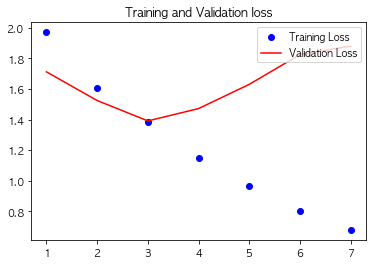

In [163]:
plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation loss')
plt.legend(loc=1)
plt.show()

In [164]:
from keras.models import load_model

loaded_model = load_model(checkpoint_path+model_name)

with open(checkpoint_path+tokenizer_name, 'rb') as handle:
    loaded_tokenizer = pickle.load(handle)

/Users/jsha/opt/anaconda3/envs/nlp3710/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


### 결과

In [165]:
test_eval = loaded_model.evaluate(x_test, y_test)

print('분류2 word_embedding+LSTM+dropout prediction')
print('prediction model loss & acc:', test_eval)

1593/1593 [==============================] - 2s 1ms/step
분류2 word_embedding+LSTM+dropout prediction
prediction model loss & acc: [1.618680285270006, 0.5310734510421753]


# 워드임베딩 + Dropout

## 분류1

In [167]:
import pandas as pd
from matplotlib import rc

rc('font', family='AppleGothic')

data_path = '/Users/jsha/gjai/nlp/pytest/16_practice/'
filename1 = '분류1_뉴스데이터_morphed_train.csv'
filename2 = '분류1_뉴스데이터_morphed_test.csv'

train_df = pd.read_csv(data_path+filename1)
test_df = pd.read_csv(data_path+filename2)

In [168]:
# train_df.head()
# train_df['morphed'] = morphed_data
train_df.head()

,id,날짜,분류1,텍스트,분류1_상위,morphed
0,1319794,20190412,"국제,중동_아프리카","이들은 성경이 난민에 대해 어떻게 말하고 있으며, 현 상황과 관련해 난민에 대한 정...",국제,성경 난민 대하 어떻하 말 있 현 상황과 관련 난민 대하 정확 하 팩트 밝히
1,1410943,20190503,"지역,충북",충북 충주시는 3일 충주시청 중앙탑회의실에서 제47회 어버이날 유공자 시상식을 열고...,지역,충북 충주시 충주시 청 중앙 탑 회의실 어버이날 유공자 시상식 열 심영섭 효행 장한...
2,972814,20190122,"스포츠,축구,국가대표팀","아시안게임이 U-23 대표팀 경기로 A 대표팀과는 객관적 지표에서 차이가 있지만, ...",스포츠,아시안게임 대표 팀 경기 대표 팀 객관적 지표 차이 있 그때 기억 황의 조의 자신감...
3,359452,20180828,"IT_과학,콘텐츠","신기술전시회 280개 기업, 국제발명특허대전 160개 발명품, 국제컨퍼런스 40개 ...",IT_과학,신기술 전시회 기업 국제 발명 특허 대전 발명품 국제 컨퍼런스 세션 꾸미 명 관람객...
4,1338926,20190416,"사회,장애인","아카데미에서는 장애인복지시설, 발달장애인훈련센터 등 학령기 장애인 대상으로의 진로직...",사회,아카데미 장애인 복지 시설 발달 장애 훈련 센터 학령기 장애인 대상 진로 직업 체험...


In [169]:
test_df.head()

,id,날짜,분류1,텍스트,분류1_상위,morphed
0,268980,20180806,"경제,증권_증시",이런 가격 조작 행위는 지난해 말 ‘코인 열풍’이 불 때부터 폭발적으로 늘어났다는 ...,경제,이런 가격 조작 행위 지난해 말 코인 열풍 불 때 폭발적 늘어나 설명
1,260551,20180803,"국제,러시아",한 정보 소식통에 따르면 이 여성은 지난해 중순쯤 국무부로부터 비밀정보 사용 인가를...,국제,하 정보 소식통 따르 이 여성 지난해 중순쯤 국무부 비밀 정보 사용 인가 취소 당하...
2,390392,20180903,"국제,아시아",시진핑(習近平) 중국 국가주석은 오는 11월 파푸아뉴기니에서 열리는 아시아·태평양경...,국제,시진 핑 중국 국가주석 오 파푸아뉴기니 열리 아시아 태평양 경제 협력체 정상 회의 ...
3,215899,20180723,"경제,무역",이번 세이프가드는 최근 3년간 평균 수입물량으로 쿼터를 산정 후 쿼터 초과 수입물량...,경제,이번 세이프가드 최근 평균 수입 물량 쿼터 산정 후 쿼터 초과 수입 물량 대하 관세...
4,380078,20180902,"스포츠,축구,국가대표팀","손흥민과 이승우, 황의조와 황희찬 등 해외에서 활약하는 선수들은 더 이상 병역 문제...",스포츠,손 흥 민 이승우 황의 황희찬 해외 활약 선수 더 이상 병역 문제 발목 잡히 국내 ...


In [170]:
from sklearn.model_selection import train_test_split

data_text = train_df.loc[:,'morphed'].to_list()
data_label = train_df.loc[:,'분류1_상위'].to_list()
print(data_label[:3])
print(data_text[:3])

print('-'*50)

data_text_test = test_df.loc[:,'morphed'].to_list()
data_label_test = test_df.loc[:,'분류1_상위'].to_list()
print(data_label_test[:3])
print(data_text_test[:3])

train_data_text = data_text
train_data_label = data_label
test_data_text = data_text_test
test_data_label = data_label_test
# train_data_text, test_data_text, train_data_label, test_data_label = \
# train_test_split(data_text, data_label, stratify=data_label, 
#                  test_size=0.3, random_state=1111)

['국제', '지역', '스포츠']
['성경 난민 대하 어떻하 말 있 현 상황과 관련 난민 대하 정확 하 팩트 밝히', '충북 충주시 충주시 청 중앙 탑 회의실 어버이날 유공자 시상식 열 심영섭 효행 장한 어버이 표창장 수여', '아시안게임 대표 팀 경기 대표 팀 객관적 지표 차이 있 그때 기억 황의 조의 자신감 불태우 충분']
--------------------------------------------------
['경제', '국제', '국제']
['이런 가격 조작 행위 지난해 말 코인 열풍 불 때 폭발적 늘어나 설명', '하 정보 소식통 따르 이 여성 지난해 중순쯤 국무부 비밀 정보 사용 인가 취소 당하 직후 해고 되', '시진 핑 중국 국가주석 오 파푸아뉴기니 열리 아시아 태평양 경제 협력체 정상 회의 전후 태평 도서 국 정상 회담 알리']


In [171]:
print(len(train_data_text))
print(len(test_data_text))

6792
2265


In [172]:
from collections import Counter
train_data_label_freq = Counter(train_data_label)
print('train_data_label_freq:', train_data_label_freq)

test_data_label_freq = Counter(test_data_label)
print('test_data_label_freq:', test_data_label_freq)


train_data_label_freq: Counter({'지역': 2151, '스포츠': 1725, '경제': 945, '국제': 733, '사회': 639, 'IT_과학': 491, '문화': 98, '미분류': 9, '정치': 1})
test_data_label_freq: Counter({'지역': 722, '스포츠': 540, '경제': 329, '국제': 219, '사회': 213, 'IT_과학': 203, '문화': 30, '미분류': 9})


In [173]:
import numpy as np

text_len = [len(line.split(' ')) for line in train_data_text]
print('최소길이:', np.min(text_len))
print('최대길이:', np.max(text_len))
print('평균길이:', np.round(np.mean(text_len),1))
print('중위수길이:', np.median(text_len))
print('percentile  : [0, 25, 50, 75, 90, 99, 100]')
print('구간별 최대 길이:', np.percentile(text_len, [0, 25, 50, 75, 90, 99, 100]))
print('최소길이 문장:', train_data_text[np.argmin(text_len)])
print('최대길이 문장:', train_data_text[np.argmax(text_len)])

최소길이: 4
최대길이: 54
평균길이: 19.5
중위수길이: 19.0
percentile  : [0, 25, 50, 75, 90, 99, 100]
구간별 최대 길이: [ 4. 16. 19. 22. 27. 35. 54.]
최소길이 문장: 투입 예산 내년 총
최대길이 문장: 주요 신규 사업 삼사해상공원 해 파랑 공원 파도 걷기 보행 조성 새 뜰 사업 축산 블루 시티 조성 사업 예 주 고을 역사 문화 공원 조성 사업 오십천 그린 로드 조성 영덕 도서관 건립 사업 영덕 애니메이션 테마파크 조성 사업 영덕 하 양교 션 강구면 화전 우수 저류 시설 설치 아름답 소하천 꾸 사업


In [174]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np
import math 

max_words = 10000
maxlen = 40

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(train_data_text)
word_index = tokenizer.word_index

In [175]:
print('wjscpdptj %s개의 고유한 토큰을 찾았습니다' % len(word_index))
print('word_index type:', type(word_index))
# print('word_index:', word_index)

wjscpdptj 18050개의 고유한 토큰을 찾았습니다
word_index type: <class 'dict'>


In [176]:
seq_data = tokenizer.texts_to_sequences(train_data_text)
# print('data', data)

len_d = [len(d) for d in seq_data]
# print('길이:', len_d)
print('최대 문장 길이:', max(len_d))
print('최소 문장 길이:', min(len_d))

최대 문장 길이: 49
최소 문장 길이: 4


In [177]:
pad_data = pad_sequences(seq_data, maxlen=maxlen)

print('data:', pad_data)
print('data 0:', pad_data[0])
print('data 0의 길이:', len(pad_data[0]))

data: [[   0    0    0 ...    1 7165   18]
 [   0    0    0 ... 7168 7169 2108]
 [   0    0    0 ... 3970 4700 1797]
 ...
 [   0    0    0 ... 9362 5861   18]
 [   0    0    0 ... 1042 1564   13]
 [   0    0    0 ... 9916 3268  362]]
data 0: [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0 2300  677   10
 2301  220    3  790 4698   76  677   10 1389    1 7165   18]
data 0의 길이: 40


In [178]:
print('train_data_text type:', type(train_data_text))
print('data type:', type(pad_data))
print('train_data_text 0:', train_data_text[0])
print('data 0:', pad_data[0])

train_data_text type: <class 'list'>
data type: <class 'numpy.ndarray'>
train_data_text 0: 성경 난민 대하 어떻하 말 있 현 상황과 관련 난민 대하 정확 하 팩트 밝히
data 0: [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0 2300  677   10
 2301  220    3  790 4698   76  677   10 1389    1 7165   18]


In [179]:
def to_one_hot(sequences, dimension):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

# x_train = to_one_hot(pad_data, dimension=max_words)
x_train = pad_data

In [180]:
# print('train_data_text type:', type(train_data_text))
# print(len(train_data_text[0]))
# print('texts 0:', train_data_text[0])

# print('data type:', type(x_train))
# print(len(x_train[0]))
# print('x_train [0][0:100]:', x_train[0][:100])

In [181]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(train_data_label)
print(le.classes_)
train_data_label = le.transform(train_data_label)

['IT_과학' '경제' '국제' '문화' '미분류' '사회' '스포츠' '정치' '지역']


In [182]:
test_data_label = le.transform(test_data_label)

In [183]:
class_number = len(le.classes_)
y_train = to_one_hot(train_data_label, dimension=class_number)
print(y_train)

[[0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 1. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


In [184]:
data_test = tokenizer.texts_to_sequences(test_data_text)

data_test = pad_sequences(data_test, maxlen=maxlen)

x_test = data_test

y_test = to_one_hot(test_data_label, dimension=class_number)
print(y_test)

[[0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]]


In [185]:
print('훈련 데이터 본문 텐서의 크기:', x_train.shape)
print('훈련 데이터 레이블 텐서의 크기:', y_train.shape)

print('테스트 데이터 본문 텐서의 크기:', x_test.shape)
print('테스트 데이터 레이블 텐서의 크기:', y_test.shape)

훈련 데이터 본문 텐서의 크기: (6792, 40)
훈련 데이터 레이블 텐서의 크기: (6792, 9)
테스트 데이터 본문 텐서의 크기: (2265, 40)
테스트 데이터 레이블 텐서의 크기: (2265, 9)


In [186]:
y_train.shape

(6792, 9)

In [187]:
!pwd

/Users/jsha/gjai/nlp/pytest/17_practice


In [188]:
import os

class_number = y_train.shape[-1]
epochs = 10
batch_size = 50
embedding_dim = 200
model_name = '분류1_we_dropout_model.h5'
tokenizer_name = '분류1_we_dropout_token.pickle'
labelencode_name = '분류1_we_dropout_le.pickle'

# working_path = '/Users/jsha/gjai/nlp/pytest/15_working/'
# save_path = working_path + 'practice/'
# if not os.path.exists(save_path):
#     os.mkdir(save_path)
#     print(f'made {save_path} directory')
# os.chdir(save_path)

In [189]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import layers
from keras import regularizers

model = Sequential()

model.add(layers.Embedding(input_dim=max_words, output_dim=embedding_dim, 
                          input_length=maxlen))

model.add(layers.Flatten())
model.add(Dropout(0.5))

model.add(Dense(64, activation='relu', input_shape=(max_words,)))
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=class_number, activation='softmax'))

model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, 40, 200)           2000000   
_________________________________________________________________
flatten_2 (Flatten)          (None, 8000)              0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 8000)              0         
_________________________________________________________________
dense_19 (Dense)             (None, 64)                512064    
_________________________________________________________________
dense_20 (Dense)             (None, 32)                2080      
_________________________________________________________________
dropout_10 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_21 (Dense)             (None, 9)                

In [190]:
from keras.callbacks import EarlyStopping
import os

checkpoint_path = working_path
# checkpoint_dir = os.path.dirname(checkpoint_path)
if os.path.exists(checkpoint_path):
    print('{} --- Folder already exists\n'.format(checkpoint_path))
else:
    os.makedirs(checkpoint_path, exist_ok=True)
    print('{} --- Folder created\n'.format(checkpoint_path))

/Users/jsha/gjai/nlp/pytest/17_practice/ --- Folder already exists



In [191]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy',
             metrics=['acc'])

In [192]:
from keras.callbacks import ModelCheckpoint

earlystop_callback = EarlyStopping(monitor='val_acc', patience=2)
cp_callback = ModelCheckpoint(filepath=checkpoint_path+model_name,
                             monitor='val_acc', verbose=1, 
                             save_best_only=True)
history = model.fit(x_train, y_train, epochs=epochs,
                   batch_size=batch_size, validation_split=0.3,
                   callbacks=[earlystop_callback, cp_callback], verbose=1)
history_dict = history.history

/Users/jsha/opt/anaconda3/envs/nlp3710/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 4754 samples, validate on 2038 samples
Epoch 1/10
4754/4754 [==============================] - 5s 1ms/step - loss: 1.8377 - acc: 0.2989 - val_loss: 1.7340 - val_acc: 0.3440

Epoch 00001: val_acc improved from -inf to 0.34396, saving model to /Users/jsha/gjai/nlp/pytest/17_practice/분류1_we_dropout_model.h5
Epoch 2/10
4754/4754 [==============================] - 5s 1ms/step - loss: 1.5335 - acc: 0.4781 - val_loss: 1.3767 - val_acc: 0.5010

Epoch 00002: val_acc improved from 0.34396 to 0.50098, saving model to /Users/jsha/gjai/nlp/pytest/17_practice/분류1_we_dropout_model.h5
Epoch 3/10
4754/4754 [==============================] - 5s 1ms/step - loss: 1.1216 - acc: 0.5915 - val_loss: 1.1456 - val_acc: 0.5913

Epoch 00003: val_acc improved from 0.50098 to 0.59127, saving model to /Users/jsha/gjai/nlp/pytest/17_practice/분류1_we_dropout_model.h5
Epoch 4/10
4754/4754 [==============================] - 5s 1ms/step - loss: 0.8385 - acc: 0.7097 - val_loss: 1.0826 - val_acc: 0.6389

Epoch 0000

In [193]:
import pickle

# model.save(model_name)

with open(checkpoint_path+tokenizer_name, 'wb') as file:
    pickle.dump(tokenizer, file, protocol=pickle.HIGHEST_PROTOCOL)
    
with open(checkpoint_path+labelencode_name, 'wb') as file:
    pickle.dump(le, file, protocol=pickle.HIGHEST_PROTOCOL)
    

In [194]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

print('validation accuracy of each epoch:', np.round(val_acc,3))
epochs = range(1, len(val_acc)+1)

validation accuracy of each epoch: [0.344 0.501 0.591 0.639 0.658 0.657 0.676 0.679 0.677 0.68 ]


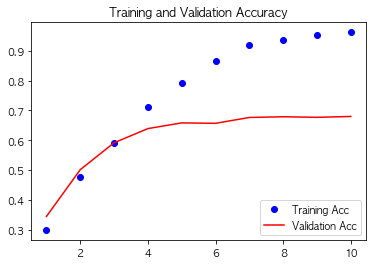

In [195]:
import matplotlib.pyplot as plt

plt.plot(epochs, acc, 'bo', label='Training Acc')
plt.plot(epochs, val_acc, 'r', label='Validation Acc')
plt.title('Training and Validation Accuracy')
plt.legend(loc=4)
plt.show()

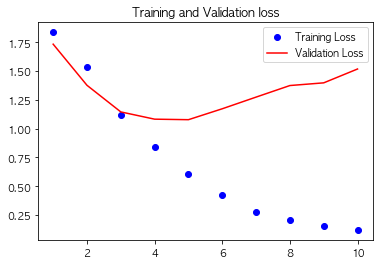

In [196]:
plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation loss')
plt.legend(loc=1)
plt.show()

In [197]:
from keras.models import load_model

loaded_model = load_model(checkpoint_path+model_name)

with open(checkpoint_path+tokenizer_name, 'rb') as handle:
    loaded_tokenizer = pickle.load(handle)

/Users/jsha/opt/anaconda3/envs/nlp3710/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


### 결과

In [198]:
test_eval = loaded_model.evaluate(x_test, y_test)

print('분류1 word_embedding+Dropout prediction')
print('prediction model loss & acc:', test_eval)

2265/2265 [==============================] - 0s 149us/step
분류1 word_embedding+Dropout prediction
prediction model loss & acc: [1.3948551461133474, 0.701545238494873]


## 분류2

In [200]:
import pandas as pd
from matplotlib import rc

rc('font', family='AppleGothic')

data_path = '/Users/jsha/gjai/nlp/pytest/16_practice/'
filename1 = '분류2_뉴스데이터_morphed_train.csv'
filename2 = '분류2_뉴스데이터_morphed_test.csv'

train_df = pd.read_csv(data_path+filename1)
test_df = pd.read_csv(data_path+filename2)

In [201]:
# train_df.head()
# train_df['morphed'] = morphed_data
train_df.head()

,id,날짜,분류2,텍스트,분류2_상위,morphed
0,1319794,20190412,"문화,출판","이들은 성경이 난민에 대해 어떻게 말하고 있으며, 현 상황과 관련해 난민에 대한 정...",문화,성경 난민 대하 어떻하 말 있 현 상황과 관련 난민 대하 정확 하 팩트 밝히
1,1410943,20190503,"사회,사회일반",충북 충주시는 3일 충주시청 중앙탑회의실에서 제47회 어버이날 유공자 시상식을 열고...,사회,충북 충주시 충주시 청 중앙 탑 회의실 어버이날 유공자 시상식 열 심영섭 효행 장한...
2,972814,20190122,"스포츠,축구,한국프로축구","아시안게임이 U-23 대표팀 경기로 A 대표팀과는 객관적 지표에서 차이가 있지만, ...",스포츠,아시안게임 대표 팀 경기 대표 팀 객관적 지표 차이 있 그때 기억 황의 조의 자신감...
3,359452,20180828,"IT_과학,과학","신기술전시회 280개 기업, 국제발명특허대전 160개 발명품, 국제컨퍼런스 40개 ...",IT_과학,신기술 전시회 기업 국제 발명 특허 대전 발명품 국제 컨퍼런스 세션 꾸미 명 관람객...
4,310019,20180816,"스포츠,축구,해외축구",손흥민은 이미 지난 2018 러시아 월드컵 조벌예선 전 경기에 출전했을 뿐더러 토트...,스포츠,손 흥 민 이미 지나 러시아 월드컵 벌 예선 전 경기 출전 토트 넘 미국 프리 시즌...


In [202]:
test_df.head()

,id,날짜,분류2,텍스트,분류2_상위,morphed
0,268980,20180806,"경제,국제경제",이런 가격 조작 행위는 지난해 말 ‘코인 열풍’이 불 때부터 폭발적으로 늘어났다는 ...,경제,이런 가격 조작 행위 지난해 말 코인 열풍 불 때 폭발적 늘어나 설명
1,260551,20180803,"국제,미국_북미",한 정보 소식통에 따르면 이 여성은 지난해 중순쯤 국무부로부터 비밀정보 사용 인가를...,국제,하 정보 소식통 따르 이 여성 지난해 중순쯤 국무부 비밀 정보 사용 인가 취소 당하...
2,390392,20180903,"국제,중국",시진핑(習近平) 중국 국가주석은 오는 11월 파푸아뉴기니에서 열리는 아시아·태평양경...,국제,시진 핑 중국 국가주석 오 파푸아뉴기니 열리 아시아 태평양 경제 협력체 정상 회의 ...
3,215899,20180723,"경제,산업_기업",이번 세이프가드는 최근 3년간 평균 수입물량으로 쿼터를 산정 후 쿼터 초과 수입물량...,경제,이번 세이프가드 최근 평균 수입 물량 쿼터 산정 후 쿼터 초과 수입 물량 대하 관세...
4,380078,20180902,"스포츠,축구,해외축구","손흥민과 이승우, 황의조와 황희찬 등 해외에서 활약하는 선수들은 더 이상 병역 문제...",스포츠,손 흥 민 이승우 황의 황희찬 해외 활약 선수 더 이상 병역 문제 발목 잡히 국내 ...


In [203]:
from sklearn.model_selection import train_test_split

data_text = train_df.loc[:,'morphed'].to_list()
data_label = train_df.loc[:,'분류2_상위'].to_list()
print(data_label[:3])
print(data_text[:3])

print('-'*50)

data_text_test = test_df.loc[:,'morphed'].to_list()
data_label_test = test_df.loc[:,'분류2_상위'].to_list()
print(data_label_test[:3])
print(data_text_test[:3])

train_data_text = data_text
train_data_label = data_label
test_data_text = data_text_test
test_data_label = data_label_test
# train_data_text, test_data_text, train_data_label, test_data_label = \
# train_test_split(data_text, data_label, stratify=data_label, 
#                  test_size=0.3, random_state=1111)

['문화', '사회', '스포츠']
['성경 난민 대하 어떻하 말 있 현 상황과 관련 난민 대하 정확 하 팩트 밝히', '충북 충주시 충주시 청 중앙 탑 회의실 어버이날 유공자 시상식 열 심영섭 효행 장한 어버이 표창장 수여', '아시안게임 대표 팀 경기 대표 팀 객관적 지표 차이 있 그때 기억 황의 조의 자신감 불태우 충분']
--------------------------------------------------
['경제', '국제', '국제']
['이런 가격 조작 행위 지난해 말 코인 열풍 불 때 폭발적 늘어나 설명', '하 정보 소식통 따르 이 여성 지난해 중순쯤 국무부 비밀 정보 사용 인가 취소 당하 직후 해고 되', '시진 핑 중국 국가주석 오 파푸아뉴기니 열리 아시아 태평양 경제 협력체 정상 회의 전후 태평 도서 국 정상 회담 알리']


In [204]:
print(len(train_data_text))
print(len(test_data_text))

4730
1593


In [205]:
from collections import Counter
train_data_label_freq = Counter(train_data_label)
print('train_data_label_freq:', train_data_label_freq)

test_data_label_freq = Counter(test_data_label)
print('test_data_label_freq:', test_data_label_freq)


train_data_label_freq: Counter({'지역': 1047, '경제': 936, '스포츠': 910, '사회': 473, '국제': 466, '문화': 463, 'IT_과학': 288, '정치': 147})
test_data_label_freq: Counter({'지역': 349, '경제': 329, '스포츠': 303, '사회': 163, '국제': 142, 'IT_과학': 126, '문화': 125, '정치': 56})


In [206]:
import numpy as np

text_len = [len(line.split(' ')) for line in train_data_text]
print('최소길이:', np.min(text_len))
print('최대길이:', np.max(text_len))
print('평균길이:', np.round(np.mean(text_len),1))
print('중위수길이:', np.median(text_len))
print('percentile  : [0, 25, 50, 75, 90, 99, 100]')
print('구간별 최대 길이:', np.percentile(text_len, [0, 25, 50, 75, 90, 99, 100]))
print('최소길이 문장:', train_data_text[np.argmin(text_len)])
print('최대길이 문장:', train_data_text[np.argmax(text_len)])

최소길이: 4
최대길이: 54
평균길이: 19.5
중위수길이: 19.0
percentile  : [0, 25, 50, 75, 90, 99, 100]
구간별 최대 길이: [ 4. 16. 19. 22. 27. 35. 54.]
최소길이 문장: 투입 예산 내년 총
최대길이 문장: 주요 신규 사업 삼사해상공원 해 파랑 공원 파도 걷기 보행 조성 새 뜰 사업 축산 블루 시티 조성 사업 예 주 고을 역사 문화 공원 조성 사업 오십천 그린 로드 조성 영덕 도서관 건립 사업 영덕 애니메이션 테마파크 조성 사업 영덕 하 양교 션 강구면 화전 우수 저류 시설 설치 아름답 소하천 꾸 사업


In [207]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np
import math 

max_words = 10000
maxlen = 40

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(train_data_text)
word_index = tokenizer.word_index

In [208]:
print('wjscpdptj %s개의 고유한 토큰을 찾았습니다' % len(word_index))
print('word_index type:', type(word_index))
# print('word_index:', word_index)

wjscpdptj 15300개의 고유한 토큰을 찾았습니다
word_index type: <class 'dict'>


In [209]:
seq_data = tokenizer.texts_to_sequences(train_data_text)
# print('data', data)

len_d = [len(d) for d in seq_data]
# print('길이:', len_d)
print('최대 문장 길이:', max(len_d))
print('최소 문장 길이:', min(len_d))

최대 문장 길이: 49
최소 문장 길이: 4


In [210]:
pad_data = pad_sequences(seq_data, maxlen=maxlen)

print('data:', pad_data)
print('data 0:', pad_data[0])
print('data 0의 길이:', len(pad_data[0]))

data: [[   0    0    0 ...    1 8205   15]
 [   0    0    0 ... 5730 8208 2302]
 [   0    0    0 ... 3627 4436 1497]
 ...
 [   0    0    0 ... 7559 4594   15]
 [   0    0    0 ... 1403 1385    9]
 [   0    0    0 ... 8034 2811  446]]
data 0: [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0 1642  747   10
 2622  208    3  885 4435   87  747   10 1270    1 8205   15]
data 0의 길이: 40


In [211]:
print('train_data_text type:', type(train_data_text))
print('data type:', type(pad_data))
print('train_data_text 0:', train_data_text[0])
print('data 0:', pad_data[0])

train_data_text type: <class 'list'>
data type: <class 'numpy.ndarray'>
train_data_text 0: 성경 난민 대하 어떻하 말 있 현 상황과 관련 난민 대하 정확 하 팩트 밝히
data 0: [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0 1642  747   10
 2622  208    3  885 4435   87  747   10 1270    1 8205   15]


In [212]:
def to_one_hot(sequences, dimension):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

# x_train = to_one_hot(pad_data, dimension=max_words)
x_train = pad_data

In [213]:
# print('train_data_text type:', type(train_data_text))
# print(len(train_data_text[0]))
# print('texts 0:', train_data_text[0])

# print('data type:', type(x_train))
# print(len(x_train[0]))
# print('x_train [0][0:100]:', x_train[0][:100])

In [214]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(train_data_label)
print(le.classes_)
train_data_label = le.transform(train_data_label)

['IT_과학' '경제' '국제' '문화' '사회' '스포츠' '정치' '지역']


In [215]:
test_data_label = le.transform(test_data_label)

In [216]:
class_number = len(le.classes_)
y_train = to_one_hot(train_data_label, dimension=class_number)
print(y_train)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [217]:
data_test = tokenizer.texts_to_sequences(test_data_text)

data_test = pad_sequences(data_test, maxlen=maxlen)

x_test = data_test

y_test = to_one_hot(test_data_label, dimension=class_number)
print(y_test)

[[0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 1. ... 0. 0. 0.]]


In [218]:
print('훈련 데이터 본문 텐서의 크기:', x_train.shape)
print('훈련 데이터 레이블 텐서의 크기:', y_train.shape)

print('테스트 데이터 본문 텐서의 크기:', x_test.shape)
print('테스트 데이터 레이블 텐서의 크기:', y_test.shape)

훈련 데이터 본문 텐서의 크기: (4730, 40)
훈련 데이터 레이블 텐서의 크기: (4730, 8)
테스트 데이터 본문 텐서의 크기: (1593, 40)
테스트 데이터 레이블 텐서의 크기: (1593, 8)


In [219]:
y_train.shape

(4730, 8)

In [220]:
!pwd

/Users/jsha/gjai/nlp/pytest/17_practice


In [221]:
import os

class_number = y_train.shape[-1]
epochs = 10
batch_size = 50
embedding_dim = 200
model_name = '분류2_we_dropout_model.h5'
tokenizer_name = '분류2_we_dropout_token.pickle'
labelencode_name = '분류2_we_dropout_le.pickle'

# working_path = '/Users/jsha/gjai/nlp/pytest/15_working/'
# save_path = working_path + 'practice/'
# if not os.path.exists(save_path):
#     os.mkdir(save_path)
#     print(f'made {save_path} directory')
# os.chdir(save_path)

In [222]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import layers
from keras import regularizers

model = Sequential()

model.add(layers.Embedding(input_dim=max_words, output_dim=embedding_dim, 
                          input_length=maxlen))

model.add(layers.Flatten())

model.add(Dense(64, activation='relu', input_shape=(max_words,)))
model.add(Dropout(0.5))
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=class_number, activation='softmax'))

model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_10 (Embedding)     (None, 40, 200)           2000000   
_________________________________________________________________
flatten_4 (Flatten)          (None, 8000)              0         
_________________________________________________________________
dense_25 (Dense)             (None, 64)                512064    
_________________________________________________________________
dropout_13 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_26 (Dense)             (None, 32)                2080      
_________________________________________________________________
dropout_14 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_27 (Dense)             (None, 8)               

In [223]:
from keras.callbacks import EarlyStopping
import os

checkpoint_path = working_path
# checkpoint_dir = os.path.dirname(checkpoint_path)
if os.path.exists(checkpoint_path):
    print('{} --- Folder already exists\n'.format(checkpoint_path))
else:
    os.makedirs(checkpoint_path, exist_ok=True)
    print('{} --- Folder created\n'.format(checkpoint_path))

/Users/jsha/gjai/nlp/pytest/17_practice/ --- Folder already exists



In [224]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy',
             metrics=['acc'])

In [225]:
from keras.callbacks import ModelCheckpoint

earlystop_callback = EarlyStopping(monitor='val_acc', patience=2)
cp_callback = ModelCheckpoint(filepath=checkpoint_path+model_name,
                             monitor='val_acc', verbose=1, 
                             save_best_only=True)
history = model.fit(x_train, y_train, epochs=epochs,
                   batch_size=batch_size, validation_split=0.3,
                   callbacks=[earlystop_callback, cp_callback], verbose=1)
history_dict = history.history

/Users/jsha/opt/anaconda3/envs/nlp3710/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 3311 samples, validate on 1419 samples
Epoch 1/10
3311/3311 [==============================] - 3s 980us/step - loss: 2.0146 - acc: 0.1978 - val_loss: 1.9643 - val_acc: 0.2333

Epoch 00001: val_acc improved from -inf to 0.23326, saving model to /Users/jsha/gjai/nlp/pytest/17_practice/분류2_we_dropout_model.h5
Epoch 2/10
3311/3311 [==============================] - 2s 726us/step - loss: 1.9177 - acc: 0.2555 - val_loss: 1.8490 - val_acc: 0.3820

Epoch 00002: val_acc improved from 0.23326 to 0.38196, saving model to /Users/jsha/gjai/nlp/pytest/17_practice/분류2_we_dropout_model.h5
Epoch 3/10
3311/3311 [==============================] - 3s 809us/step - loss: 1.6620 - acc: 0.3899 - val_loss: 1.5808 - val_acc: 0.4024

Epoch 00003: val_acc improved from 0.38196 to 0.40240, saving model to /Users/jsha/gjai/nlp/pytest/17_practice/분류2_we_dropout_model.h5
Epoch 4/10
3311/3311 [==============================] - 3s 846us/step - loss: 1.3385 - acc: 0.4733 - val_loss: 1.4409 - val_acc: 0.4834

Ep

In [226]:
import pickle

# model.save(model_name)

with open(checkpoint_path+tokenizer_name, 'wb') as file:
    pickle.dump(tokenizer, file, protocol=pickle.HIGHEST_PROTOCOL)
    
with open(checkpoint_path+labelencode_name, 'wb') as file:
    pickle.dump(le, file, protocol=pickle.HIGHEST_PROTOCOL)
    

In [227]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

print('validation accuracy of each epoch:', np.round(val_acc,3))
epochs = range(1, len(val_acc)+1)

validation accuracy of each epoch: [0.233 0.382 0.402 0.483 0.536 0.538 0.56  0.56  0.565 0.564]


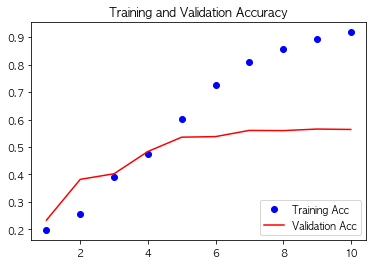

In [228]:
import matplotlib.pyplot as plt

plt.plot(epochs, acc, 'bo', label='Training Acc')
plt.plot(epochs, val_acc, 'r', label='Validation Acc')
plt.title('Training and Validation Accuracy')
plt.legend(loc=4)
plt.show()

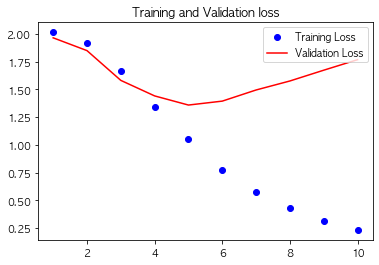

In [229]:
plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation loss')
plt.legend(loc=1)
plt.show()

In [230]:
from keras.models import load_model

loaded_model = load_model(checkpoint_path+model_name)

with open(checkpoint_path+tokenizer_name, 'rb') as handle:
    loaded_tokenizer = pickle.load(handle)

/Users/jsha/opt/anaconda3/envs/nlp3710/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


### 결과

In [231]:
test_eval = loaded_model.evaluate(x_test, y_test)

print('분류2 word_embedding+dropout prediction')
print('prediction model loss & acc:', test_eval)

1593/1593 [==============================] - 0s 166us/step
분류2 word_embedding+dropout prediction
prediction model loss & acc: [1.7243916527400283, 0.5674827098846436]


# 워드임베딩 + 양방향 순환신경망

## 분류1

In [235]:
import pandas as pd
from matplotlib import rc

rc('font', family='AppleGothic')

data_path = '/Users/jsha/gjai/nlp/pytest/16_practice/'
filename1 = '분류1_뉴스데이터_morphed_train.csv'
filename2 = '분류1_뉴스데이터_morphed_test.csv'

train_df = pd.read_csv(data_path+filename1)
test_df = pd.read_csv(data_path+filename2)

In [236]:
# train_df.head()
# train_df['morphed'] = morphed_data
train_df.head()

,id,날짜,분류1,텍스트,분류1_상위,morphed
0,1319794,20190412,"국제,중동_아프리카","이들은 성경이 난민에 대해 어떻게 말하고 있으며, 현 상황과 관련해 난민에 대한 정...",국제,성경 난민 대하 어떻하 말 있 현 상황과 관련 난민 대하 정확 하 팩트 밝히
1,1410943,20190503,"지역,충북",충북 충주시는 3일 충주시청 중앙탑회의실에서 제47회 어버이날 유공자 시상식을 열고...,지역,충북 충주시 충주시 청 중앙 탑 회의실 어버이날 유공자 시상식 열 심영섭 효행 장한...
2,972814,20190122,"스포츠,축구,국가대표팀","아시안게임이 U-23 대표팀 경기로 A 대표팀과는 객관적 지표에서 차이가 있지만, ...",스포츠,아시안게임 대표 팀 경기 대표 팀 객관적 지표 차이 있 그때 기억 황의 조의 자신감...
3,359452,20180828,"IT_과학,콘텐츠","신기술전시회 280개 기업, 국제발명특허대전 160개 발명품, 국제컨퍼런스 40개 ...",IT_과학,신기술 전시회 기업 국제 발명 특허 대전 발명품 국제 컨퍼런스 세션 꾸미 명 관람객...
4,1338926,20190416,"사회,장애인","아카데미에서는 장애인복지시설, 발달장애인훈련센터 등 학령기 장애인 대상으로의 진로직...",사회,아카데미 장애인 복지 시설 발달 장애 훈련 센터 학령기 장애인 대상 진로 직업 체험...


In [237]:
test_df.head()

,id,날짜,분류1,텍스트,분류1_상위,morphed
0,268980,20180806,"경제,증권_증시",이런 가격 조작 행위는 지난해 말 ‘코인 열풍’이 불 때부터 폭발적으로 늘어났다는 ...,경제,이런 가격 조작 행위 지난해 말 코인 열풍 불 때 폭발적 늘어나 설명
1,260551,20180803,"국제,러시아",한 정보 소식통에 따르면 이 여성은 지난해 중순쯤 국무부로부터 비밀정보 사용 인가를...,국제,하 정보 소식통 따르 이 여성 지난해 중순쯤 국무부 비밀 정보 사용 인가 취소 당하...
2,390392,20180903,"국제,아시아",시진핑(習近平) 중국 국가주석은 오는 11월 파푸아뉴기니에서 열리는 아시아·태평양경...,국제,시진 핑 중국 국가주석 오 파푸아뉴기니 열리 아시아 태평양 경제 협력체 정상 회의 ...
3,215899,20180723,"경제,무역",이번 세이프가드는 최근 3년간 평균 수입물량으로 쿼터를 산정 후 쿼터 초과 수입물량...,경제,이번 세이프가드 최근 평균 수입 물량 쿼터 산정 후 쿼터 초과 수입 물량 대하 관세...
4,380078,20180902,"스포츠,축구,국가대표팀","손흥민과 이승우, 황의조와 황희찬 등 해외에서 활약하는 선수들은 더 이상 병역 문제...",스포츠,손 흥 민 이승우 황의 황희찬 해외 활약 선수 더 이상 병역 문제 발목 잡히 국내 ...


In [238]:
from sklearn.model_selection import train_test_split

data_text = train_df.loc[:,'morphed'].to_list()
data_label = train_df.loc[:,'분류1_상위'].to_list()
print(data_label[:3])
print(data_text[:3])

print('-'*50)

data_text_test = test_df.loc[:,'morphed'].to_list()
data_label_test = test_df.loc[:,'분류1_상위'].to_list()
print(data_label_test[:3])
print(data_text_test[:3])

train_data_text = data_text
train_data_label = data_label
test_data_text = data_text_test
test_data_label = data_label_test
# train_data_text, test_data_text, train_data_label, test_data_label = \
# train_test_split(data_text, data_label, stratify=data_label, 
#                  test_size=0.3, random_state=1111)

['국제', '지역', '스포츠']
['성경 난민 대하 어떻하 말 있 현 상황과 관련 난민 대하 정확 하 팩트 밝히', '충북 충주시 충주시 청 중앙 탑 회의실 어버이날 유공자 시상식 열 심영섭 효행 장한 어버이 표창장 수여', '아시안게임 대표 팀 경기 대표 팀 객관적 지표 차이 있 그때 기억 황의 조의 자신감 불태우 충분']
--------------------------------------------------
['경제', '국제', '국제']
['이런 가격 조작 행위 지난해 말 코인 열풍 불 때 폭발적 늘어나 설명', '하 정보 소식통 따르 이 여성 지난해 중순쯤 국무부 비밀 정보 사용 인가 취소 당하 직후 해고 되', '시진 핑 중국 국가주석 오 파푸아뉴기니 열리 아시아 태평양 경제 협력체 정상 회의 전후 태평 도서 국 정상 회담 알리']


In [239]:
print(len(train_data_text))
print(len(test_data_text))

6792
2265


In [240]:
from collections import Counter
train_data_label_freq = Counter(train_data_label)
print('train_data_label_freq:', train_data_label_freq)

test_data_label_freq = Counter(test_data_label)
print('test_data_label_freq:', test_data_label_freq)


train_data_label_freq: Counter({'지역': 2151, '스포츠': 1725, '경제': 945, '국제': 733, '사회': 639, 'IT_과학': 491, '문화': 98, '미분류': 9, '정치': 1})
test_data_label_freq: Counter({'지역': 722, '스포츠': 540, '경제': 329, '국제': 219, '사회': 213, 'IT_과학': 203, '문화': 30, '미분류': 9})


In [241]:
import numpy as np

text_len = [len(line.split(' ')) for line in train_data_text]
print('최소길이:', np.min(text_len))
print('최대길이:', np.max(text_len))
print('평균길이:', np.round(np.mean(text_len),1))
print('중위수길이:', np.median(text_len))
print('percentile  : [0, 25, 50, 75, 90, 99, 100]')
print('구간별 최대 길이:', np.percentile(text_len, [0, 25, 50, 75, 90, 99, 100]))
print('최소길이 문장:', train_data_text[np.argmin(text_len)])
print('최대길이 문장:', train_data_text[np.argmax(text_len)])

최소길이: 4
최대길이: 54
평균길이: 19.5
중위수길이: 19.0
percentile  : [0, 25, 50, 75, 90, 99, 100]
구간별 최대 길이: [ 4. 16. 19. 22. 27. 35. 54.]
최소길이 문장: 투입 예산 내년 총
최대길이 문장: 주요 신규 사업 삼사해상공원 해 파랑 공원 파도 걷기 보행 조성 새 뜰 사업 축산 블루 시티 조성 사업 예 주 고을 역사 문화 공원 조성 사업 오십천 그린 로드 조성 영덕 도서관 건립 사업 영덕 애니메이션 테마파크 조성 사업 영덕 하 양교 션 강구면 화전 우수 저류 시설 설치 아름답 소하천 꾸 사업


In [242]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np
import math 

max_words = 10000
maxlen = 40

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(train_data_text)
word_index = tokenizer.word_index

In [243]:
print('wjscpdptj %s개의 고유한 토큰을 찾았습니다' % len(word_index))
print('word_index type:', type(word_index))
# print('word_index:', word_index)

wjscpdptj 18050개의 고유한 토큰을 찾았습니다
word_index type: <class 'dict'>


In [244]:
seq_data = tokenizer.texts_to_sequences(train_data_text)
# print('data', data)

len_d = [len(d) for d in seq_data]
# print('길이:', len_d)
print('최대 문장 길이:', max(len_d))
print('최소 문장 길이:', min(len_d))

최대 문장 길이: 49
최소 문장 길이: 4


In [245]:
pad_data = pad_sequences(seq_data, maxlen=maxlen)

print('data:', pad_data)
print('data 0:', pad_data[0])
print('data 0의 길이:', len(pad_data[0]))

data: [[   0    0    0 ...    1 7165   18]
 [   0    0    0 ... 7168 7169 2108]
 [   0    0    0 ... 3970 4700 1797]
 ...
 [   0    0    0 ... 9362 5861   18]
 [   0    0    0 ... 1042 1564   13]
 [   0    0    0 ... 9916 3268  362]]
data 0: [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0 2300  677   10
 2301  220    3  790 4698   76  677   10 1389    1 7165   18]
data 0의 길이: 40


In [246]:
print('train_data_text type:', type(train_data_text))
print('data type:', type(pad_data))
print('train_data_text 0:', train_data_text[0])
print('data 0:', pad_data[0])

train_data_text type: <class 'list'>
data type: <class 'numpy.ndarray'>
train_data_text 0: 성경 난민 대하 어떻하 말 있 현 상황과 관련 난민 대하 정확 하 팩트 밝히
data 0: [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0 2300  677   10
 2301  220    3  790 4698   76  677   10 1389    1 7165   18]


In [247]:
def to_one_hot(sequences, dimension):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

# x_train = to_one_hot(pad_data, dimension=max_words)
x_train = pad_data

In [248]:
# print('train_data_text type:', type(train_data_text))
# print(len(train_data_text[0]))
# print('texts 0:', train_data_text[0])

# print('data type:', type(x_train))
# print(len(x_train[0]))
# print('x_train [0][0:100]:', x_train[0][:100])

In [249]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(train_data_label)
print(le.classes_)
train_data_label = le.transform(train_data_label)

['IT_과학' '경제' '국제' '문화' '미분류' '사회' '스포츠' '정치' '지역']


In [250]:
test_data_label = le.transform(test_data_label)

In [251]:
class_number = len(le.classes_)
y_train = to_one_hot(train_data_label, dimension=class_number)
print(y_train)

[[0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 1. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


In [252]:
data_test = tokenizer.texts_to_sequences(test_data_text)

data_test = pad_sequences(data_test, maxlen=maxlen)

x_test = data_test

y_test = to_one_hot(test_data_label, dimension=class_number)
print(y_test)

[[0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]]


In [253]:
print('훈련 데이터 본문 텐서의 크기:', x_train.shape)
print('훈련 데이터 레이블 텐서의 크기:', y_train.shape)

print('테스트 데이터 본문 텐서의 크기:', x_test.shape)
print('테스트 데이터 레이블 텐서의 크기:', y_test.shape)

훈련 데이터 본문 텐서의 크기: (6792, 40)
훈련 데이터 레이블 텐서의 크기: (6792, 9)
테스트 데이터 본문 텐서의 크기: (2265, 40)
테스트 데이터 레이블 텐서의 크기: (2265, 9)


In [254]:
y_train.shape

(6792, 9)

In [255]:
!pwd

/Users/jsha/gjai/nlp/pytest/17_practice


In [256]:
import os

class_number = y_train.shape[-1]
epochs = 10
batch_size = 50
embedding_dim = 200
model_name = '분류1_we_bidirectional_LSTM_model.h5'
tokenizer_name = '분류1_we_bidirectional_LSTM_token.pickle'
labelencode_name = '분류1_we_bidirectional_LSTM_le.pickle'

# working_path = '/Users/jsha/gjai/nlp/pytest/15_working/'
# save_path = working_path + 'practice/'
# if not os.path.exists(save_path):
#     os.mkdir(save_path)
#     print(f'made {save_path} directory')
# os.chdir(save_path)

In [257]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import layers
from keras import regularizers

model = Sequential()

model.add(layers.Embedding(input_dim=max_words, output_dim=embedding_dim, 
                          input_length=maxlen))

model.add(layers.Bidirectional(layers.LSTM(128)))

model.add(Dense(64, activation='relu', input_shape=(max_words,)))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=class_number, activation='softmax'))

model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_13 (Embedding)     (None, 40, 200)           2000000   
_________________________________________________________________
bidirectional_2 (Bidirection (None, 256)               336896    
_________________________________________________________________
dense_31 (Dense)             (None, 64)                16448     
_________________________________________________________________
dense_32 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_33 (Dense)             (None, 9)                 297       
Total params: 2,355,721
Trainable params: 2,355,721
Non-trainable params: 0
_________________________________________________________________


In [258]:
from keras.callbacks import EarlyStopping
import os

checkpoint_path = working_path
# checkpoint_dir = os.path.dirname(checkpoint_path)
if os.path.exists(checkpoint_path):
    print('{} --- Folder already exists\n'.format(checkpoint_path))
else:
    os.makedirs(checkpoint_path, exist_ok=True)
    print('{} --- Folder created\n'.format(checkpoint_path))

/Users/jsha/gjai/nlp/pytest/17_practice/ --- Folder already exists



In [259]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy',
             metrics=['acc'])

In [260]:
from keras.callbacks import ModelCheckpoint

earlystop_callback = EarlyStopping(monitor='val_acc', patience=2)
cp_callback = ModelCheckpoint(filepath=checkpoint_path+model_name,
                             monitor='val_acc', verbose=1, 
                             save_best_only=True)
history = model.fit(x_train, y_train, epochs=epochs,
                   batch_size=batch_size, validation_split=0.3,
                   callbacks=[earlystop_callback, cp_callback], verbose=1)
history_dict = history.history

/Users/jsha/opt/anaconda3/envs/nlp3710/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 4754 samples, validate on 2038 samples
Epoch 1/10
4754/4754 [==============================] - 27s 6ms/step - loss: 1.5533 - acc: 0.4340 - val_loss: 1.4349 - val_acc: 0.4887

Epoch 00001: val_acc improved from -inf to 0.48871, saving model to /Users/jsha/gjai/nlp/pytest/17_practice/분류1_we_bidirectional_LSTM_model.h5
Epoch 2/10
4754/4754 [==============================] - 25s 5ms/step - loss: 1.1252 - acc: 0.5972 - val_loss: 1.1477 - val_acc: 0.5981

Epoch 00002: val_acc improved from 0.48871 to 0.59814, saving model to /Users/jsha/gjai/nlp/pytest/17_practice/분류1_we_bidirectional_LSTM_model.h5
Epoch 3/10
4754/4754 [==============================] - 24s 5ms/step - loss: 0.8632 - acc: 0.7021 - val_loss: 1.2546 - val_acc: 0.5412

Epoch 00003: val_acc did not improve from 0.59814
Epoch 4/10
4754/4754 [==============================] - 24s 5ms/step - loss: 0.6246 - acc: 0.7960 - val_loss: 1.1339 - val_acc: 0.6683

Epoch 00004: val_acc improved from 0.59814 to 0.66830, saving model t

In [261]:
import pickle

# model.save(model_name)

with open(checkpoint_path+tokenizer_name, 'wb') as file:
    pickle.dump(tokenizer, file, protocol=pickle.HIGHEST_PROTOCOL)
    
with open(checkpoint_path+labelencode_name, 'wb') as file:
    pickle.dump(le, file, protocol=pickle.HIGHEST_PROTOCOL)
    

In [262]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

print('validation accuracy of each epoch:', np.round(val_acc,3))
epochs = range(1, len(val_acc)+1)

validation accuracy of each epoch: [0.489 0.598 0.541 0.668 0.666 0.69  0.701 0.687 0.695]


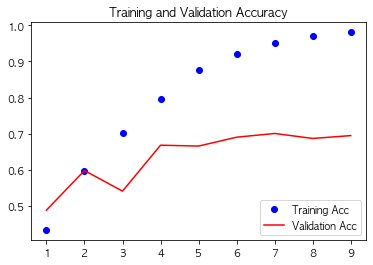

In [263]:
import matplotlib.pyplot as plt

plt.plot(epochs, acc, 'bo', label='Training Acc')
plt.plot(epochs, val_acc, 'r', label='Validation Acc')
plt.title('Training and Validation Accuracy')
plt.legend(loc=4)
plt.show()

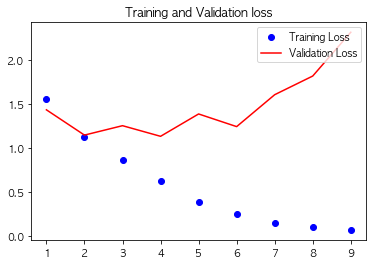

In [264]:
plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation loss')
plt.legend(loc=1)
plt.show()

In [265]:
from keras.models import load_model

loaded_model = load_model(checkpoint_path+model_name)

with open(checkpoint_path+tokenizer_name, 'rb') as handle:
    loaded_tokenizer = pickle.load(handle)

/Users/jsha/opt/anaconda3/envs/nlp3710/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


### 결과

In [267]:
test_eval = loaded_model.evaluate(x_test, y_test)

print('분류1 word_embedding+bidirectiona_LSTM prediction')
print('prediction model loss & acc:', test_eval)

2265/2265 [==============================] - 3s 1ms/step
분류1 word_embedding+bidirectiona_LSTM prediction
prediction model loss & acc: [1.4709418651547126, 0.7143487930297852]


## 분류2

In [268]:
import pandas as pd
from matplotlib import rc

rc('font', family='AppleGothic')

data_path = '/Users/jsha/gjai/nlp/pytest/16_practice/'
filename1 = '분류2_뉴스데이터_morphed_train.csv'
filename2 = '분류2_뉴스데이터_morphed_test.csv'

train_df = pd.read_csv(data_path+filename1)
test_df = pd.read_csv(data_path+filename2)

In [269]:
# train_df.head()
# train_df['morphed'] = morphed_data
train_df.head()

,id,날짜,분류2,텍스트,분류2_상위,morphed
0,1319794,20190412,"문화,출판","이들은 성경이 난민에 대해 어떻게 말하고 있으며, 현 상황과 관련해 난민에 대한 정...",문화,성경 난민 대하 어떻하 말 있 현 상황과 관련 난민 대하 정확 하 팩트 밝히
1,1410943,20190503,"사회,사회일반",충북 충주시는 3일 충주시청 중앙탑회의실에서 제47회 어버이날 유공자 시상식을 열고...,사회,충북 충주시 충주시 청 중앙 탑 회의실 어버이날 유공자 시상식 열 심영섭 효행 장한...
2,972814,20190122,"스포츠,축구,한국프로축구","아시안게임이 U-23 대표팀 경기로 A 대표팀과는 객관적 지표에서 차이가 있지만, ...",스포츠,아시안게임 대표 팀 경기 대표 팀 객관적 지표 차이 있 그때 기억 황의 조의 자신감...
3,359452,20180828,"IT_과학,과학","신기술전시회 280개 기업, 국제발명특허대전 160개 발명품, 국제컨퍼런스 40개 ...",IT_과학,신기술 전시회 기업 국제 발명 특허 대전 발명품 국제 컨퍼런스 세션 꾸미 명 관람객...
4,310019,20180816,"스포츠,축구,해외축구",손흥민은 이미 지난 2018 러시아 월드컵 조벌예선 전 경기에 출전했을 뿐더러 토트...,스포츠,손 흥 민 이미 지나 러시아 월드컵 벌 예선 전 경기 출전 토트 넘 미국 프리 시즌...


In [270]:
test_df.head()

,id,날짜,분류2,텍스트,분류2_상위,morphed
0,268980,20180806,"경제,국제경제",이런 가격 조작 행위는 지난해 말 ‘코인 열풍’이 불 때부터 폭발적으로 늘어났다는 ...,경제,이런 가격 조작 행위 지난해 말 코인 열풍 불 때 폭발적 늘어나 설명
1,260551,20180803,"국제,미국_북미",한 정보 소식통에 따르면 이 여성은 지난해 중순쯤 국무부로부터 비밀정보 사용 인가를...,국제,하 정보 소식통 따르 이 여성 지난해 중순쯤 국무부 비밀 정보 사용 인가 취소 당하...
2,390392,20180903,"국제,중국",시진핑(習近平) 중국 국가주석은 오는 11월 파푸아뉴기니에서 열리는 아시아·태평양경...,국제,시진 핑 중국 국가주석 오 파푸아뉴기니 열리 아시아 태평양 경제 협력체 정상 회의 ...
3,215899,20180723,"경제,산업_기업",이번 세이프가드는 최근 3년간 평균 수입물량으로 쿼터를 산정 후 쿼터 초과 수입물량...,경제,이번 세이프가드 최근 평균 수입 물량 쿼터 산정 후 쿼터 초과 수입 물량 대하 관세...
4,380078,20180902,"스포츠,축구,해외축구","손흥민과 이승우, 황의조와 황희찬 등 해외에서 활약하는 선수들은 더 이상 병역 문제...",스포츠,손 흥 민 이승우 황의 황희찬 해외 활약 선수 더 이상 병역 문제 발목 잡히 국내 ...


In [271]:
from sklearn.model_selection import train_test_split

data_text = train_df.loc[:,'morphed'].to_list()
data_label = train_df.loc[:,'분류2_상위'].to_list()
print(data_label[:3])
print(data_text[:3])

print('-'*50)

data_text_test = test_df.loc[:,'morphed'].to_list()
data_label_test = test_df.loc[:,'분류2_상위'].to_list()
print(data_label_test[:3])
print(data_text_test[:3])

train_data_text = data_text
train_data_label = data_label
test_data_text = data_text_test
test_data_label = data_label_test
# train_data_text, test_data_text, train_data_label, test_data_label = \
# train_test_split(data_text, data_label, stratify=data_label, 
#                  test_size=0.3, random_state=1111)

['문화', '사회', '스포츠']
['성경 난민 대하 어떻하 말 있 현 상황과 관련 난민 대하 정확 하 팩트 밝히', '충북 충주시 충주시 청 중앙 탑 회의실 어버이날 유공자 시상식 열 심영섭 효행 장한 어버이 표창장 수여', '아시안게임 대표 팀 경기 대표 팀 객관적 지표 차이 있 그때 기억 황의 조의 자신감 불태우 충분']
--------------------------------------------------
['경제', '국제', '국제']
['이런 가격 조작 행위 지난해 말 코인 열풍 불 때 폭발적 늘어나 설명', '하 정보 소식통 따르 이 여성 지난해 중순쯤 국무부 비밀 정보 사용 인가 취소 당하 직후 해고 되', '시진 핑 중국 국가주석 오 파푸아뉴기니 열리 아시아 태평양 경제 협력체 정상 회의 전후 태평 도서 국 정상 회담 알리']


In [272]:
print(len(train_data_text))
print(len(test_data_text))

4730
1593


In [273]:
from collections import Counter
train_data_label_freq = Counter(train_data_label)
print('train_data_label_freq:', train_data_label_freq)

test_data_label_freq = Counter(test_data_label)
print('test_data_label_freq:', test_data_label_freq)


train_data_label_freq: Counter({'지역': 1047, '경제': 936, '스포츠': 910, '사회': 473, '국제': 466, '문화': 463, 'IT_과학': 288, '정치': 147})
test_data_label_freq: Counter({'지역': 349, '경제': 329, '스포츠': 303, '사회': 163, '국제': 142, 'IT_과학': 126, '문화': 125, '정치': 56})


In [274]:
import numpy as np

text_len = [len(line.split(' ')) for line in train_data_text]
print('최소길이:', np.min(text_len))
print('최대길이:', np.max(text_len))
print('평균길이:', np.round(np.mean(text_len),1))
print('중위수길이:', np.median(text_len))
print('percentile  : [0, 25, 50, 75, 90, 99, 100]')
print('구간별 최대 길이:', np.percentile(text_len, [0, 25, 50, 75, 90, 99, 100]))
print('최소길이 문장:', train_data_text[np.argmin(text_len)])
print('최대길이 문장:', train_data_text[np.argmax(text_len)])

최소길이: 4
최대길이: 54
평균길이: 19.5
중위수길이: 19.0
percentile  : [0, 25, 50, 75, 90, 99, 100]
구간별 최대 길이: [ 4. 16. 19. 22. 27. 35. 54.]
최소길이 문장: 투입 예산 내년 총
최대길이 문장: 주요 신규 사업 삼사해상공원 해 파랑 공원 파도 걷기 보행 조성 새 뜰 사업 축산 블루 시티 조성 사업 예 주 고을 역사 문화 공원 조성 사업 오십천 그린 로드 조성 영덕 도서관 건립 사업 영덕 애니메이션 테마파크 조성 사업 영덕 하 양교 션 강구면 화전 우수 저류 시설 설치 아름답 소하천 꾸 사업


In [275]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np
import math 

max_words = 10000
maxlen = 40

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(train_data_text)
word_index = tokenizer.word_index

In [276]:
print('wjscpdptj %s개의 고유한 토큰을 찾았습니다' % len(word_index))
print('word_index type:', type(word_index))
# print('word_index:', word_index)

wjscpdptj 15300개의 고유한 토큰을 찾았습니다
word_index type: <class 'dict'>


In [277]:
seq_data = tokenizer.texts_to_sequences(train_data_text)
# print('data', data)

len_d = [len(d) for d in seq_data]
# print('길이:', len_d)
print('최대 문장 길이:', max(len_d))
print('최소 문장 길이:', min(len_d))

최대 문장 길이: 49
최소 문장 길이: 4


In [278]:
pad_data = pad_sequences(seq_data, maxlen=maxlen)

print('data:', pad_data)
print('data 0:', pad_data[0])
print('data 0의 길이:', len(pad_data[0]))

data: [[   0    0    0 ...    1 8205   15]
 [   0    0    0 ... 5730 8208 2302]
 [   0    0    0 ... 3627 4436 1497]
 ...
 [   0    0    0 ... 7559 4594   15]
 [   0    0    0 ... 1403 1385    9]
 [   0    0    0 ... 8034 2811  446]]
data 0: [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0 1642  747   10
 2622  208    3  885 4435   87  747   10 1270    1 8205   15]
data 0의 길이: 40


In [279]:
print('train_data_text type:', type(train_data_text))
print('data type:', type(pad_data))
print('train_data_text 0:', train_data_text[0])
print('data 0:', pad_data[0])

train_data_text type: <class 'list'>
data type: <class 'numpy.ndarray'>
train_data_text 0: 성경 난민 대하 어떻하 말 있 현 상황과 관련 난민 대하 정확 하 팩트 밝히
data 0: [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0 1642  747   10
 2622  208    3  885 4435   87  747   10 1270    1 8205   15]


In [280]:
def to_one_hot(sequences, dimension):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

# x_train = to_one_hot(pad_data, dimension=max_words)
x_train = pad_data

In [281]:
# print('train_data_text type:', type(train_data_text))
# print(len(train_data_text[0]))
# print('texts 0:', train_data_text[0])

# print('data type:', type(x_train))
# print(len(x_train[0]))
# print('x_train [0][0:100]:', x_train[0][:100])

In [282]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(train_data_label)
print(le.classes_)
train_data_label = le.transform(train_data_label)

['IT_과학' '경제' '국제' '문화' '사회' '스포츠' '정치' '지역']


In [283]:
test_data_label = le.transform(test_data_label)

In [284]:
class_number = len(le.classes_)
y_train = to_one_hot(train_data_label, dimension=class_number)
print(y_train)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [285]:
data_test = tokenizer.texts_to_sequences(test_data_text)

data_test = pad_sequences(data_test, maxlen=maxlen)

x_test = data_test

y_test = to_one_hot(test_data_label, dimension=class_number)
print(y_test)

[[0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 1. ... 0. 0. 0.]]


In [286]:
print('훈련 데이터 본문 텐서의 크기:', x_train.shape)
print('훈련 데이터 레이블 텐서의 크기:', y_train.shape)

print('테스트 데이터 본문 텐서의 크기:', x_test.shape)
print('테스트 데이터 레이블 텐서의 크기:', y_test.shape)

훈련 데이터 본문 텐서의 크기: (4730, 40)
훈련 데이터 레이블 텐서의 크기: (4730, 8)
테스트 데이터 본문 텐서의 크기: (1593, 40)
테스트 데이터 레이블 텐서의 크기: (1593, 8)


In [287]:
y_train.shape

(4730, 8)

In [288]:
!pwd

/Users/jsha/gjai/nlp/pytest/17_practice


In [289]:
import os

class_number = y_train.shape[-1]
epochs = 10
batch_size = 50
embedding_dim = 200
model_name = '분류2_we_bidirectional_LSTM_model.h5'
tokenizer_name = '분류2_we_bidirectional_LSTM_token.pickle'
labelencode_name = '분류2_we_bidirectional_LSTM_le.pickle'

# working_path = '/Users/jsha/gjai/nlp/pytest/15_working/'
# save_path = working_path + 'practice/'
# if not os.path.exists(save_path):
#     os.mkdir(save_path)
#     print(f'made {save_path} directory')
# os.chdir(save_path)

In [290]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import layers
from keras import regularizers

model = Sequential()

model.add(layers.Embedding(input_dim=max_words, output_dim=embedding_dim, 
                          input_length=maxlen))

model.add(layers.Bidirectional(layers.LSTM(128)))

model.add(Dense(64, activation='relu', input_shape=(max_words,)))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=class_number, activation='softmax'))

model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_14 (Embedding)     (None, 40, 200)           2000000   
_________________________________________________________________
bidirectional_3 (Bidirection (None, 256)               336896    
_________________________________________________________________
dense_34 (Dense)             (None, 64)                16448     
_________________________________________________________________
dense_35 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_36 (Dense)             (None, 8)                 264       
Total params: 2,355,688
Trainable params: 2,355,688
Non-trainable params: 0
_________________________________________________________________


In [291]:
from keras.callbacks import EarlyStopping
import os

checkpoint_path = working_path
# checkpoint_dir = os.path.dirname(checkpoint_path)
if os.path.exists(checkpoint_path):
    print('{} --- Folder already exists\n'.format(checkpoint_path))
else:
    os.makedirs(checkpoint_path, exist_ok=True)
    print('{} --- Folder created\n'.format(checkpoint_path))

/Users/jsha/gjai/nlp/pytest/17_practice/ --- Folder already exists



In [292]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy',
             metrics=['acc'])

In [293]:
from keras.callbacks import ModelCheckpoint

earlystop_callback = EarlyStopping(monitor='val_acc', patience=2)
cp_callback = ModelCheckpoint(filepath=checkpoint_path+model_name,
                             monitor='val_acc', verbose=1, 
                             save_best_only=True)
history = model.fit(x_train, y_train, epochs=epochs,
                   batch_size=batch_size, validation_split=0.3,
                   callbacks=[earlystop_callback, cp_callback], verbose=1)
history_dict = history.history

/Users/jsha/opt/anaconda3/envs/nlp3710/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 3311 samples, validate on 1419 samples
Epoch 1/10
3311/3311 [==============================] - 18s 5ms/step - loss: 1.9101 - acc: 0.2591 - val_loss: 1.7009 - val_acc: 0.3820

Epoch 00001: val_acc improved from -inf to 0.38196, saving model to /Users/jsha/gjai/nlp/pytest/17_practice/분류2_we_bidirectional_LSTM_model.h5
Epoch 2/10
3311/3311 [==============================] - 16s 5ms/step - loss: 1.3897 - acc: 0.5014 - val_loss: 1.3659 - val_acc: 0.5144

Epoch 00002: val_acc improved from 0.38196 to 0.51445, saving model to /Users/jsha/gjai/nlp/pytest/17_practice/분류2_we_bidirectional_LSTM_model.h5
Epoch 3/10
3311/3311 [==============================] - 16s 5ms/step - loss: 1.0135 - acc: 0.6406 - val_loss: 1.4396 - val_acc: 0.5180

Epoch 00003: val_acc improved from 0.51445 to 0.51797, saving model to /Users/jsha/gjai/nlp/pytest/17_practice/분류2_we_bidirectional_LSTM_model.h5
Epoch 4/10
3311/3311 [==============================] - 16s 5ms/step - loss: 0.7523 - acc: 0.7348 - val_loss:

In [300]:
import pickle

# model.save(model_name)

with open(checkpoint_path+tokenizer_name, 'wb') as file:
    pickle.dump(tokenizer, file, protocol=pickle.HIGHEST_PROTOCOL)
    
with open(checkpoint_path+labelencode_name, 'wb') as file:
    pickle.dump(le, file, protocol=pickle.HIGHEST_PROTOCOL)
    

In [301]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

print('validation accuracy of each epoch:', np.round(val_acc,3))
epochs = range(1, len(val_acc)+1)

validation accuracy of each epoch: [0.382 0.514 0.518 0.533 0.543 0.54  0.559 0.551 0.562 0.546]


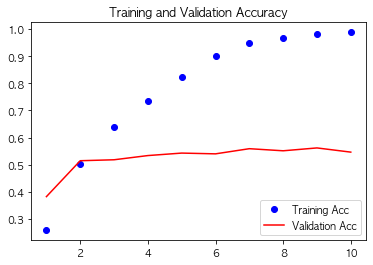

In [302]:
import matplotlib.pyplot as plt

plt.plot(epochs, acc, 'bo', label='Training Acc')
plt.plot(epochs, val_acc, 'r', label='Validation Acc')
plt.title('Training and Validation Accuracy')
plt.legend(loc=4)
plt.show()

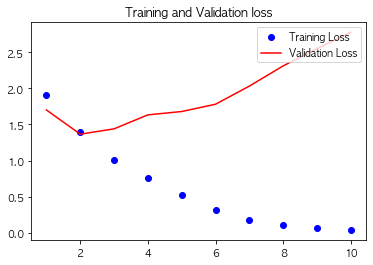

In [303]:
plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation loss')
plt.legend(loc=1)
plt.show()

In [304]:
from keras.models import load_model

loaded_model = load_model(checkpoint_path+model_name)

with open(checkpoint_path+tokenizer_name, 'rb') as handle:
    loaded_tokenizer = pickle.load(handle)

/Users/jsha/opt/anaconda3/envs/nlp3710/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


### 결과

In [305]:
test_eval = loaded_model.evaluate(x_test, y_test)

print('분류2 word_embedding+bidirectional_LSTM prediction')
print('prediction model loss & acc:', test_eval)

1593/1593 [==============================] - 3s 2ms/step
분류2 word_embedding+bidirectional_LSTM prediction
prediction model loss & acc: [2.6581631511992354, 0.5379786491394043]
